Data Loading and Cleaning


In [1]:
# import json

# input_file = "Appliances.jsonl"
# output_file = "clean_Appliances.jsonl"

# valid_lines = []

# # Open the input file and process each line
# with open(input_file, 'r', encoding='utf-8') as fp:
#     for i, line in enumerate(fp):
#         try:
#             # Attempt to load and parse the JSON line
#             json.loads(line.strip())
#             valid_lines.append(line)  # If valid, append to valid_lines list
#         except json.JSONDecodeError as e:
#             # If invalid JSON, print the line number and error
#             print(f"Skipping line {i + 1}: {e}")

# # Save the cleaned data (valid JSON lines) to the output file
# with open(output_file, 'w', encoding='utf-8') as fp:
#     fp.writelines(valid_lines)

# print(f"Cleaned file saved as {output_file}, Total valid lines: {len(valid_lines)}")


In [2]:
import json

file ="clean_Appliances.jsonl" # e.g., "meta_All_Beauty.jsonl", downloaded from the `meta` link above
with open(file, 'r') as fp:
    for i, line in enumerate(fp):
        if i == 10:  # Stop after printing 10 lines
            break
        print(json.loads(line.strip()))

{'rating': 5.0, 'title': 'DIY life saver for dishwasher', 'text': 'Much cheaper DIY FIX for dishwasher than service call', 'images': [], 'asin': 'B07RCVRTJ8', 'parent_asin': 'B07RCVRTJ8', 'user_id': 'AFUYABKLHWTJLJA5RW7LMWNAANSA', 'timestamp': 1580141646652, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Easy install good filtration', 'text': 'These aftermarket filters work very well in my refrigerator', 'images': [], 'asin': 'B01CC83YAK', 'parent_asin': 'B0BXWBPVYS', 'user_id': 'AH2UGEK2SRJ2KOZVRIOQCAQ4YURA', 'timestamp': 1569763383768, 'helpful_vote': 0, 'verified_purchase': True}
{'rating': 5.0, 'title': 'Works Perfectly', 'text': "LG water filters are pretty expensive considering they need to be changed every 6 months. This filter, from a different manufacturer, is cheaper but seem to work just as well. It fit perfectly, was easy to install, and hasn't leaked. I will purchase again when it is time to change filters.", 'images': [], 'asin': 'B01NBYGVJS', 'pa

In [3]:
import pandas as pd

data = []
with open(file, 'r') as fp:
    for line in fp:
        data.append(json.loads(line.strip()))

df = pd.DataFrame(data)


In [4]:
# import json

# input_file = "meta_Appliances.jsonl"
# output_file = "clean_meta_Appliances.jsonl"

# valid_lines = []

# # Open the input file and process each line
# with open(input_file, 'r', encoding='utf-8') as fp:
#     for i, line in enumerate(fp):
#         try:
#             # Attempt to load and parse the JSON line
#             json.loads(line.strip())
#             valid_lines.append(line)
#             print(f"Valid line {i+1}") # If valid, append to valid_lines list
#         except json.JSONDecodeError as e:
#             # If invalid JSON, print the line number and error
#             print(f"Skipping line {i + 1}: {e}")

# # Save the cleaned data (valid JSON lines) to the output file
# with open(output_file, 'w', encoding='utf-8') as fp:
#     fp.writelines(valid_lines)

# print(f"Cleaned file saved as {output_file}, Total valid lines: {len(valid_lines)}")


In [5]:
import json

file ="clean_meta_Appliances.jsonl" # e.g., "meta_All_Beauty.jsonl", downloaded from the `meta` link above
with open(file, 'r') as fp:
    for i, line in enumerate(fp):
        if i == 10:  # Stop after printing 10 lines
            break
        print(json.loads(line.strip()))

{'main_category': 'Industrial & Scientific', 'title': 'ROVSUN Ice Maker Machine Countertop, Make 44lbs Ice in 24 Hours, Compact & Portable Ice Maker with Ice Basket for Home, Office, Kitchen, Bar (Silver)', 'average_rating': 3.7, 'rating_number': 61, 'features': ['【Quick Ice Making】This countertop ice machine creates crystal & bullet shaped ice cubes; 44lbs of ice ready in 24 hours, 12 cubes made per cycle within 10 mins; you can perfectly use it for drinks, wine, smoothies, food', '【Portable Design】The weight of this ice maker is only 23.3lbs, and the small size (10.63 x14.37 x 12.87)" makes it portable. It\'s compact feature is perfect for home, office, apartments, dormitories, RVs and more, it can be placed on countertop or tabletop, plug it anywhere you like', '【Simple Operation】Adding the water tank with purified water; Power on machine and press "on/off" button to start ice making process; After 8-12 minutes, ice cube will fall off into the ice basket automatically; Take it out a

In [6]:
import pandas as pd

data = []
with open(file, 'r') as fp:
    for line in fp:
        data.append(json.loads(line.strip()))

mdf = pd.DataFrame(data)


In [7]:
merged_df = df.merge(mdf[['parent_asin', 'price']], on="parent_asin", how="left")


In [8]:
merged_df.isna().sum()/len(merged_df)

rating               0.000000
title                0.000000
text                 0.000000
images               0.000000
asin                 0.000000
parent_asin          0.000000
user_id              0.000000
timestamp            0.000000
helpful_vote         0.000000
verified_purchase    0.000000
price                0.244067
dtype: float64

In [9]:
merged_df['text'] = merged_df['text'].fillna('')

In [10]:
merged_df = merged_df.dropna(subset=['price'])

In [11]:
merged_df.head()

rating                          title  \
0     5.0  DIY life saver for dishwasher   
1     5.0   Easy install good filtration   
2     5.0                Works Perfectly   
3     5.0                     Works well   
4     5.0  Great addition to Aeropresss.   

                                                text images        asin  \
0  Much cheaper DIY FIX for dishwasher than servi...     []  B07RCVRTJ8   
1  These aftermarket filters work very well in my...     []  B01CC83YAK   
2  LG water filters are pretty expensive consider...     []  B01NBYGVJS   
3            The filter fit and was easy to install.     []  B071F7XNS1   
4  I am enjoying experimenting with the different...     []  B01C94E17C   

  parent_asin                       user_id      timestamp  helpful_vote  \
0  B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA  1580141646652             0   
1  B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA  1569763383768             0   
2  B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ  1587127866235             0   
3  B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ  1561382733008             2   
4  B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ  1481200122000             1   

   verified_purchase  price  
0               True   7.95  
1               True  21.99  
2               True  11.87  
3               True   8.99  
4               True  15.48

In [12]:
merged_df=merged_df.drop(columns=["images"])

In [13]:
print(merged_df.columns)

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'price'],
      dtype='object')


In [14]:
merged_df.isna().sum()/len(merged_df)

rating               0.0
title                0.0
text                 0.0
asin                 0.0
parent_asin          0.0
user_id              0.0
timestamp            0.0
helpful_vote         0.0
verified_purchase    0.0
price                0.0
dtype: float64

In [15]:
merged_df['verified_purchase']=merged_df['verified_purchase'].astype(int)

In [16]:
merged_df.applymap(lambda x: isinstance(x, list)).sum()


<ipython-input-16-403f24d62410>:1: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  merged_df.applymap(lambda x: isinstance(x, list)).sum()


rating               0
title                0
text                 0
asin                 0
parent_asin          0
user_id              0
timestamp            0
helpful_vote         0
verified_purchase    0
price                0
dtype: int64

In [17]:
merged_df.duplicated().sum()

588

In [18]:
merged_df[merged_df.duplicated()].head()

rating                                   title  \
102     5.0                         The right part!   
103     5.0  and the right and good quality product   
230     5.0                        They work great.   
330     5.0                                    Pace   
934     5.0                            As described   

                                                  text        asin  \
102                 Installed easily and does the job.  B07QYQR3VW   
103  Arrived timely, and the right and good quality...  B00439HLWE   
230  They work great for a good price.  Bosch refri...  B01CC83YAK   
330  Currently my product broke. Reason unknown. BU...  B073BLHCND   
934  Can say much of anything else.  It does what i...  B000MR6I9I   

    parent_asin                       user_id      timestamp  helpful_vote  \
102  B07QYQR3VW  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1668078458171             0   
103  B00439HLY2  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1441801927000             1   
230  B0BXWBPVYS  AEW42H4W7NEWJPZYI3K5BPRPFEJA  1530227931689             0   
330  B073BLHCND  AFKJSQRRWLBRCTL5ZACXX36HHLBQ  1561221063251            15   
934  B07QV3TH8K  AFIFTDUOOIATTMD7MQ666Y5KIF4A  1377808621000             0   

     verified_purchase   price  
102                  1    7.85  
103                  1   27.10  
230                  1   21.99  
330                  1  339.32  
934                  1   18.00

In [19]:
merged_df[(merged_df['user_id'] == 'AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ') & (merged_df['asin'] == 'B07QYQR3VW')]

rating            title                                text        asin  \
98      5.0  The right part!  Installed easily and does the job.  B07QYQR3VW   
102     5.0  The right part!  Installed easily and does the job.  B07QYQR3VW   

    parent_asin                       user_id      timestamp  helpful_vote  \
98   B07QYQR3VW  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1668078458171             0   
102  B07QYQR3VW  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1668078458171             0   

     verified_purchase  price  
98                   1   7.85  
102                  1   7.85

In [20]:
merged_df[(merged_df['user_id'] == 'AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ') & (merged_df['asin'] == 'B00439HLWE')]

rating                                   title  \
99      5.0  and the right and good quality product   
103     5.0  and the right and good quality product   

                                                  text        asin  \
99   Arrived timely, and the right and good quality...  B00439HLWE   
103  Arrived timely, and the right and good quality...  B00439HLWE   

    parent_asin                       user_id      timestamp  helpful_vote  \
99   B00439HLY2  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1441801927000             1   
103  B00439HLY2  AHUEOZLDMC6UGG5VDPP4KJ4DFXEQ  1441801927000             1   

     verified_purchase  price  
99                   1   27.1  
103                  1   27.1

In [21]:
merged_df.drop_duplicates(inplace=True)

In [22]:
merged_df['timestamp'] = pd.to_datetime(merged_df['timestamp'] // 1000, unit='s')

In [23]:
merged_df

rating                                              title  \
0          5.0                      DIY life saver for dishwasher   
1          5.0                       Easy install good filtration   
2          5.0                                    Works Perfectly   
3          5.0                                         Works well   
4          5.0                      Great addition to Aeropresss.   
...        ...                                                ...   
217622     5.0                                Perfect Replacement   
217623     5.0                 Very good value compared to retail   
217624     5.0  Great to find replacement for a 20 year old ye...   
217626     5.0  ... phasing out the vue cups and I have a grea...   
217627     1.0  The ability to determine the correct measureme...   

                                                     text        asin  \
0       Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8   
1       These aftermarket filters work very well in my...  B01CC83YAK   
2       LG water filters are pretty expensive consider...  B01NBYGVJS   
3                 The filter fit and was easy to install.  B071F7XNS1   
4       I am enjoying experimenting with the different...  B01C94E17C   
...                                                   ...         ...   
217622               Perfect replacement, as advertised 😊  B06XDHXDVL   
217623                     good value and promot service.  B01MXOV32V   
217624  Fits my Maytag dishwasher perfectly.  Inexpens...  B00LQDAYSI   
217626  I order  from Kreuig and understand that they ...  B00ZG1CG3W   
217627         Far over priced no matter where purchased!  B07DSMGFX9   

       parent_asin                       user_id           timestamp  \
0       B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06   
1       B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03   
2       B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:51:06   
3       B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2019-06-24 13:25:33   
4       B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2016-12-08 12:28:42   
...            ...                           ...                 ...   
217622  B06XDHXDVL  AHX6LBH6WA5C4NJ7MWUVAHZ5CEJQ 2017-05-25 09:43:48   
217623  B01MXOV32V  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2020-09-18 12:42:46   
217624  B00LQDAYSI  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2016-06-25 13:25:38   
217626  B00ZG1CG3W  AHMS3Q5X4TNNGG76MONGMEVA5VZA 2018-03-02 14:20:42   
217627  B07DSMGFX9  AECRDQRGBD33HSS7MCLZKGRCUHFA 2022-01-13 19:13:15   

        helpful_vote  verified_purchase   price  
0                  0                  1    7.95  
1                  0                  1   21.99  
2                  0                  1   11.87  
3                  2                  1    8.99  
4                  1                  1   15.48  
...              ...                ...     ...  
217622             1                  1   17.65  
217623             0                  1   21.99  
217624             2                  1   24.31  
217626             3                  1   17.99  
217627             0                  1  155.00  

[163925 rows x 10 columns]

Data Preprocessing and Feature Extraction

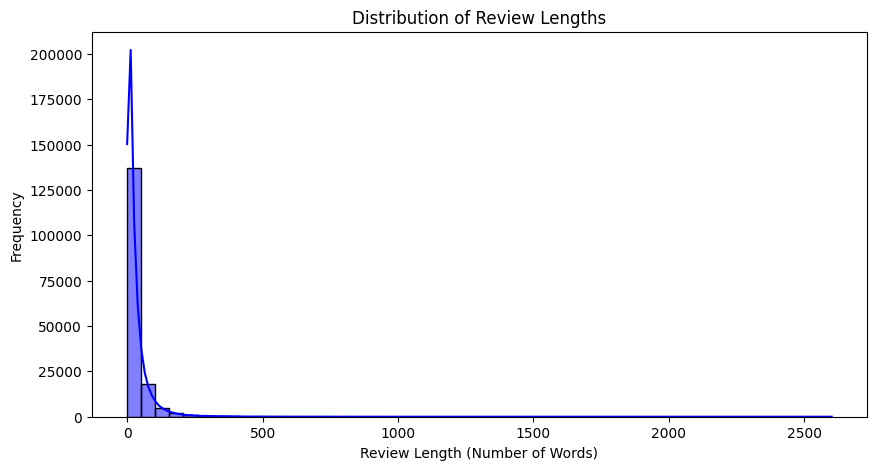

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate review lengths
merged_df['review_length'] = merged_df['text'].apply(lambda x: len(x.split()))

# Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(merged_df['review_length'], bins=50, kde=True, color='blue')

# Labels and title
plt.xlabel("Review Length (Number of Words)")
plt.ylabel("Frequency")
plt.title("Distribution of Review Lengths")
plt.show()


In [25]:
merged_df['is_short_review'] = merged_df['review_length'] < 10  # Flag very short reviews
merged_df.drop(columns=['review_length'], inplace=True)  # Drop the temporary column

In [26]:
# Count how many times a user reviews the same product
user_product_reviews = merged_df.groupby(['user_id', 'asin']).size().reset_index(name='review_count')

# Flag users who review the same product more than once
merged_df = merged_df.merge(user_product_reviews, on=['user_id', 'asin'], how='left')
merged_df['is_suspicious_user'] = merged_df['review_count'] > 1
merged_df.drop(columns=['review_count'], inplace=True)

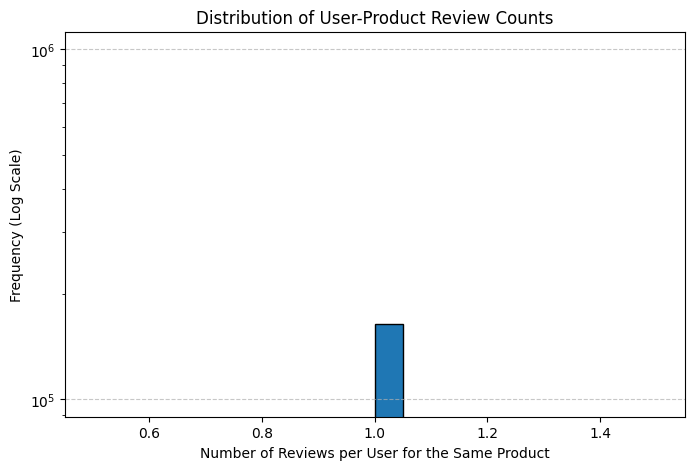

In [27]:
plt.figure(figsize=(8, 5))
plt.hist(user_product_reviews['review_count'], bins=20, edgecolor='black', log=True)
plt.xlabel("Number of Reviews per User for the Same Product")
plt.ylabel("Frequency (Log Scale)")
plt.title("Distribution of User-Product Review Counts")
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()
merged_df.drop(columns=['is_suspicious_user'], inplace=True)

In [28]:
print(merged_df.columns)

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'price',
       'is_short_review'],
      dtype='object')


In [29]:
merged_df['review_date'] = merged_df['timestamp'].dt.date
review_counts = merged_df.groupby(['parent_asin', 'review_date']).size().reset_index(name='daily_review_count')
merged_df = merged_df.merge(review_counts, on=['parent_asin', 'review_date'], how='left')
merged_df['is_review_burst'] = merged_df['daily_review_count'] > merged_df['daily_review_count'].quantile(0.95)  # Flag anomalies

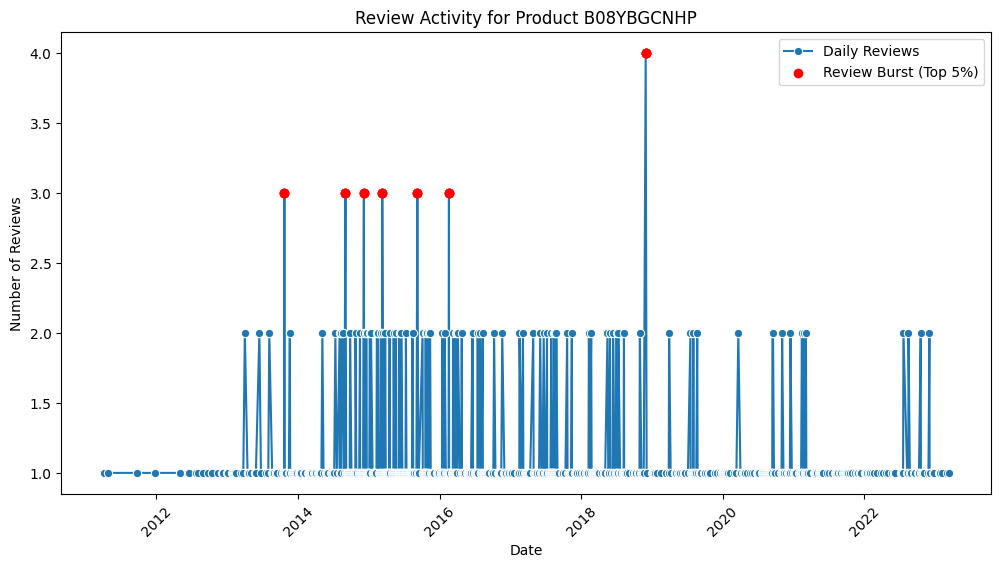

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select a sample product to visualize review bursts
sample_asin = merged_df['parent_asin'].value_counts().idxmax()  # Pick the most reviewed product
sample_df = merged_df[merged_df['parent_asin'] == sample_asin]

# Plot the daily review count
plt.figure(figsize=(12, 6))
sns.lineplot(data=sample_df, x='review_date', y='daily_review_count', marker='o', label='Daily Reviews')

# Highlight burst days
burst_days = sample_df[sample_df['is_review_burst']]
plt.scatter(burst_days['review_date'], burst_days['daily_review_count'],
            color='r', label='Review Burst (Top 5%)', zorder=3)

plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.title(f'Review Activity for Product {sample_asin}')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [31]:
merged_df

rating                                              title  \
0          5.0                      DIY life saver for dishwasher   
1          5.0                       Easy install good filtration   
2          5.0                                    Works Perfectly   
3          5.0                                         Works well   
4          5.0                      Great addition to Aeropresss.   
...        ...                                                ...   
163920     5.0                                Perfect Replacement   
163921     5.0                 Very good value compared to retail   
163922     5.0  Great to find replacement for a 20 year old ye...   
163923     5.0  ... phasing out the vue cups and I have a grea...   
163924     1.0  The ability to determine the correct measureme...   

                                                     text        asin  \
0       Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8   
1       These aftermarket filters work very well in my...  B01CC83YAK   
2       LG water filters are pretty expensive consider...  B01NBYGVJS   
3                 The filter fit and was easy to install.  B071F7XNS1   
4       I am enjoying experimenting with the different...  B01C94E17C   
...                                                   ...         ...   
163920               Perfect replacement, as advertised 😊  B06XDHXDVL   
163921                     good value and promot service.  B01MXOV32V   
163922  Fits my Maytag dishwasher perfectly.  Inexpens...  B00LQDAYSI   
163923  I order  from Kreuig and understand that they ...  B00ZG1CG3W   
163924         Far over priced no matter where purchased!  B07DSMGFX9   

       parent_asin                       user_id           timestamp  \
0       B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06   
1       B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03   
2       B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:51:06   
3       B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2019-06-24 13:25:33   
4       B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2016-12-08 12:28:42   
...            ...                           ...                 ...   
163920  B06XDHXDVL  AHX6LBH6WA5C4NJ7MWUVAHZ5CEJQ 2017-05-25 09:43:48   
163921  B01MXOV32V  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2020-09-18 12:42:46   
163922  B00LQDAYSI  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2016-06-25 13:25:38   
163923  B00ZG1CG3W  AHMS3Q5X4TNNGG76MONGMEVA5VZA 2018-03-02 14:20:42   
163924  B07DSMGFX9  AECRDQRGBD33HSS7MCLZKGRCUHFA 2022-01-13 19:13:15   

        helpful_vote  verified_purchase   price  is_short_review review_date  \
0                  0                  1    7.95             True  2020-01-27   
1                  0                  1   21.99             True  2019-09-29   
2                  0                  1   11.87            False  2020-04-17   
3                  2                  1    8.99             True  2019-06-24   
4                  1                  1   15.48            False  2016-12-08   
...              ...                ...     ...              ...         ...   
163920             1                  1   17.65             True  2017-05-25   
163921             0                  1   21.99             True  2020-09-18   
163922             2                  1   24.31            False  2016-06-25   
163923             3                  1   17.99            False  2018-03-02   
163924             0                  1  155.00             True  2022-01-13   

        daily_review_count  is_review_burst  
0                        1            False  
1                        1            False  
2                        1            False  
3                        1            False  
4                        1            False  
...                    ...              ...  
163920                   1            False  
163921                   1            False  
163922                   1            False  
163923          

In [32]:
merged_df.drop(columns=['review_date'], inplace=True)
merged_df.drop(columns=['daily_review_count'], inplace=True)

In [33]:
merged_df

rating                                              title  \
0          5.0                      DIY life saver for dishwasher   
1          5.0                       Easy install good filtration   
2          5.0                                    Works Perfectly   
3          5.0                                         Works well   
4          5.0                      Great addition to Aeropresss.   
...        ...                                                ...   
163920     5.0                                Perfect Replacement   
163921     5.0                 Very good value compared to retail   
163922     5.0  Great to find replacement for a 20 year old ye...   
163923     5.0  ... phasing out the vue cups and I have a grea...   
163924     1.0  The ability to determine the correct measureme...   

                                                     text        asin  \
0       Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8   
1       These aftermarket filters work very well in my...  B01CC83YAK   
2       LG water filters are pretty expensive consider...  B01NBYGVJS   
3                 The filter fit and was easy to install.  B071F7XNS1   
4       I am enjoying experimenting with the different...  B01C94E17C   
...                                                   ...         ...   
163920               Perfect replacement, as advertised 😊  B06XDHXDVL   
163921                     good value and promot service.  B01MXOV32V   
163922  Fits my Maytag dishwasher perfectly.  Inexpens...  B00LQDAYSI   
163923  I order  from Kreuig and understand that they ...  B00ZG1CG3W   
163924         Far over priced no matter where purchased!  B07DSMGFX9   

       parent_asin                       user_id           timestamp  \
0       B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06   
1       B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03   
2       B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:51:06   
3       B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2019-06-24 13:25:33   
4       B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2016-12-08 12:28:42   
...            ...                           ...                 ...   
163920  B06XDHXDVL  AHX6LBH6WA5C4NJ7MWUVAHZ5CEJQ 2017-05-25 09:43:48   
163921  B01MXOV32V  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2020-09-18 12:42:46   
163922  B00LQDAYSI  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2016-06-25 13:25:38   
163923  B00ZG1CG3W  AHMS3Q5X4TNNGG76MONGMEVA5VZA 2018-03-02 14:20:42   
163924  B07DSMGFX9  AECRDQRGBD33HSS7MCLZKGRCUHFA 2022-01-13 19:13:15   

        helpful_vote  verified_purchase   price  is_short_review  \
0                  0                  1    7.95             True   
1                  0                  1   21.99             True   
2                  0                  1   11.87            False   
3                  2                  1    8.99             True   
4                  1                  1   15.48            False   
...              ...                ...     ...              ...   
163920             1                  1   17.65             True   
163921             0                  1   21.99             True   
163922             2                  1   24.31            False   
163923             3                  1   17.99            False   
163924             0                  1  155.00             True   

        is_review_burst  
0                 False  
1                 False  
2                 False  
3                 False  
4                 False  
...                 ...  
163920            False  
163921            False  
163922            False  
163923            False  
163924            False  

[163925 rows x 12 columns]

In [34]:
merged_df['is_short_review']=merged_df['is_short_review'].astype(int)
merged_df['is_review_burst']=merged_df['is_review_burst'].astype(int)

In [35]:
merged_df

rating                                              title  \
0          5.0                      DIY life saver for dishwasher   
1          5.0                       Easy install good filtration   
2          5.0                                    Works Perfectly   
3          5.0                                         Works well   
4          5.0                      Great addition to Aeropresss.   
...        ...                                                ...   
163920     5.0                                Perfect Replacement   
163921     5.0                 Very good value compared to retail   
163922     5.0  Great to find replacement for a 20 year old ye...   
163923     5.0  ... phasing out the vue cups and I have a grea...   
163924     1.0  The ability to determine the correct measureme...   

                                                     text        asin  \
0       Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8   
1       These aftermarket filters work very well in my...  B01CC83YAK   
2       LG water filters are pretty expensive consider...  B01NBYGVJS   
3                 The filter fit and was easy to install.  B071F7XNS1   
4       I am enjoying experimenting with the different...  B01C94E17C   
...                                                   ...         ...   
163920               Perfect replacement, as advertised 😊  B06XDHXDVL   
163921                     good value and promot service.  B01MXOV32V   
163922  Fits my Maytag dishwasher perfectly.  Inexpens...  B00LQDAYSI   
163923  I order  from Kreuig and understand that they ...  B00ZG1CG3W   
163924         Far over priced no matter where purchased!  B07DSMGFX9   

       parent_asin                       user_id           timestamp  \
0       B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06   
1       B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03   
2       B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:51:06   
3       B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2019-06-24 13:25:33   
4       B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2016-12-08 12:28:42   
...            ...                           ...                 ...   
163920  B06XDHXDVL  AHX6LBH6WA5C4NJ7MWUVAHZ5CEJQ 2017-05-25 09:43:48   
163921  B01MXOV32V  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2020-09-18 12:42:46   
163922  B00LQDAYSI  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2016-06-25 13:25:38   
163923  B00ZG1CG3W  AHMS3Q5X4TNNGG76MONGMEVA5VZA 2018-03-02 14:20:42   
163924  B07DSMGFX9  AECRDQRGBD33HSS7MCLZKGRCUHFA 2022-01-13 19:13:15   

        helpful_vote  verified_purchase   price  is_short_review  \
0                  0                  1    7.95                1   
1                  0                  1   21.99                1   
2                  0                  1   11.87                0   
3                  2                  1    8.99                1   
4                  1                  1   15.48                0   
...              ...                ...     ...              ...   
163920             1                  1   17.65                1   
163921             0                  1   21.99                1   
163922             2                  1   24.31                0   
163923             3                  1   17.99                0   
163924             0                  1  155.00                1   

        is_review_burst  
0                     0  
1                     0  
2                     0  
3                     0  
4                     0  
...                 ...  
163920                0  
163921                0  
163922                0  
163923                0  
163924                0  

[163925 rows x 12 columns]

In [36]:
import numpy as np
merged_df["user_id"].value_counts()
np.quantile(merged_df["user_id"].value_counts().values, np.arange(0,1.05,0.05)).astype(int)

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,
        2,  2,  3, 35])

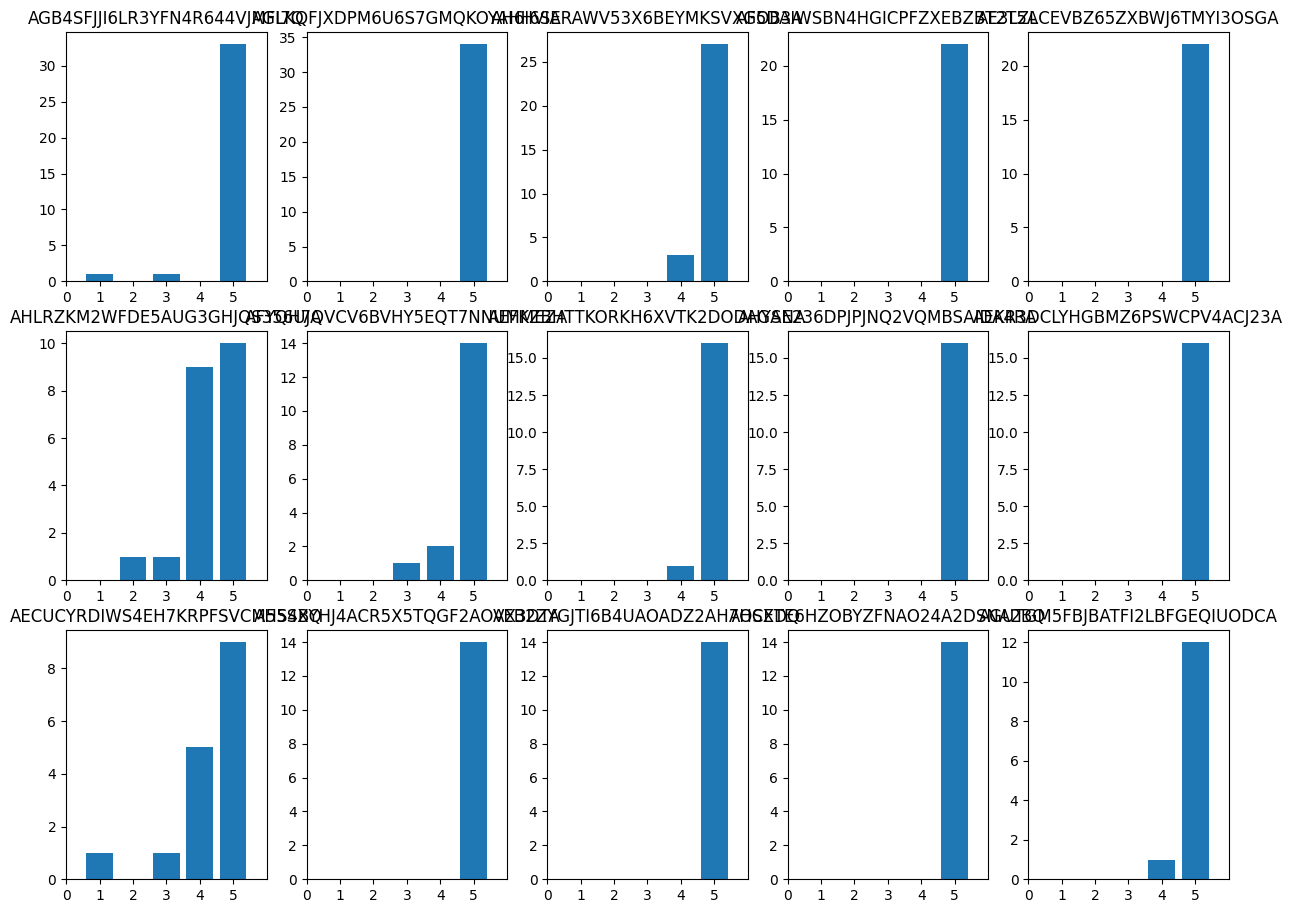

In [37]:
plt.subplots(3,5, figsize=(15,11))

for i in range(0,15):
    #get reviewers ID
    reviewer = merged_df["user_id"].value_counts().index[i]
    #get value counts for each reviewer (the overall rating they give with each review)
    data = merged_df['rating'][merged_df['user_id'] == reviewer].value_counts()

    #now let's look at a couple different reviewers and their rating pattern
    plt.subplot(3,5,i+1)
    plt.bar(data.index, data.values)
    plt.title(reviewer)
    plt.xlim(0,6)
    plt.xticks(range(6))
plt.show()

<ipython-input-38-d1179ba487c0>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")


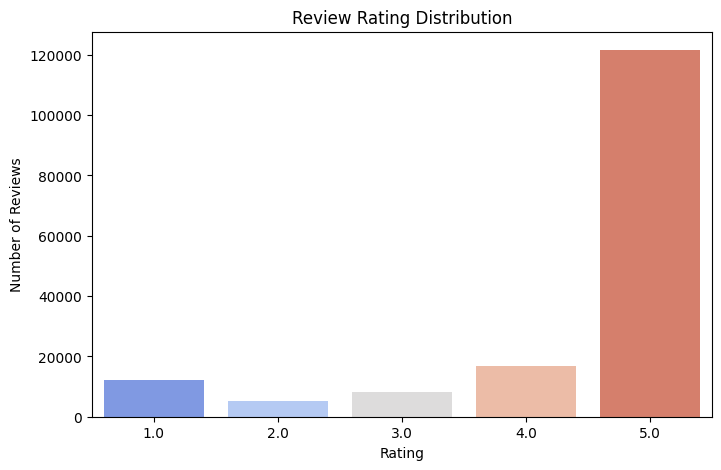

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count of each rating
rating_counts = merged_df["rating"].value_counts().sort_index()

# Plot bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=rating_counts.index, y=rating_counts.values, palette="coolwarm")

# Labels and title
plt.xlabel("Rating")
plt.ylabel("Number of Reviews")
plt.title("Review Rating Distribution")
plt.xticks(rotation=0)  # Keep x-axis labels readable
plt.show()


In [39]:

#creating feature that indicates whether each review is the only review a reviewer has posted or if the reviewer has posted other
#reviews as well (no=0, yes=1)

#1. start by getting a dictionary of the number of reviews per unique reviewer
map_numreviews = merged_df['user_id'].value_counts().to_dict()
#2. map the dictionary above to the reviewers in the dataframe and create a new column from this
merged_df['multipleReviews_reviewer'] = merged_df['user_id'].map(map_numreviews)
#3. finally, convert the number of reviews to binary: 1 review = 0; more than 1 review = 1
merged_df['multipleReviews_reviewer'] = np.where(merged_df['multipleReviews_reviewer'] > 1, 1, 0)

In [40]:
merged_df

rating                                              title  \
0          5.0                      DIY life saver for dishwasher   
1          5.0                       Easy install good filtration   
2          5.0                                    Works Perfectly   
3          5.0                                         Works well   
4          5.0                      Great addition to Aeropresss.   
...        ...                                                ...   
163920     5.0                                Perfect Replacement   
163921     5.0                 Very good value compared to retail   
163922     5.0  Great to find replacement for a 20 year old ye...   
163923     5.0  ... phasing out the vue cups and I have a grea...   
163924     1.0  The ability to determine the correct measureme...   

                                                     text        asin  \
0       Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8   
1       These aftermarket filters work very well in my...  B01CC83YAK   
2       LG water filters are pretty expensive consider...  B01NBYGVJS   
3                 The filter fit and was easy to install.  B071F7XNS1   
4       I am enjoying experimenting with the different...  B01C94E17C   
...                                                   ...         ...   
163920               Perfect replacement, as advertised 😊  B06XDHXDVL   
163921                     good value and promot service.  B01MXOV32V   
163922  Fits my Maytag dishwasher perfectly.  Inexpens...  B00LQDAYSI   
163923  I order  from Kreuig and understand that they ...  B00ZG1CG3W   
163924         Far over priced no matter where purchased!  B07DSMGFX9   

       parent_asin                       user_id           timestamp  \
0       B07RCVRTJ8  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06   
1       B0BXWBPVYS  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03   
2       B01NBYGVJS  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:51:06   
3       B071F7XNS1  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2019-06-24 13:25:33   
4       B01C94E17C  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2016-12-08 12:28:42   
...            ...                           ...                 ...   
163920  B06XDHXDVL  AHX6LBH6WA5C4NJ7MWUVAHZ5CEJQ 2017-05-25 09:43:48   
163921  B01MXOV32V  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2020-09-18 12:42:46   
163922  B00LQDAYSI  AHKHOSTP7M4SZXPDRPGGLO6ZN67Q 2016-06-25 13:25:38   
163923  B00ZG1CG3W  AHMS3Q5X4TNNGG76MONGMEVA5VZA 2018-03-02 14:20:42   
163924  B07DSMGFX9  AECRDQRGBD33HSS7MCLZKGRCUHFA 2022-01-13 19:13:15   

        helpful_vote  verified_purchase   price  is_short_review  \
0                  0                  1    7.95                1   
1                  0                  1   21.99                1   
2                  0                  1   11.87                0   
3                  2                  1    8.99                1   
4                  1                  1   15.48                0   
...              ...                ...     ...              ...   
163920             1                  1   17.65                1   
163921             0                  1   21.99                1   
163922             2                  1   24.31                0   
163923             3                  1   17.99                0   
163924             0                  1  155.00                1   

        is_review_burst  multipleReviews_reviewer  
0                     0                         0  
1                     0                         0  
2                     0                         1  
3                     0                         1  
4                     0                         1  
...                 ...                       ...  
163920                0                         0  
163921                0                         1  
163922                0                         1  
163923                0                         0  
163924                0                         

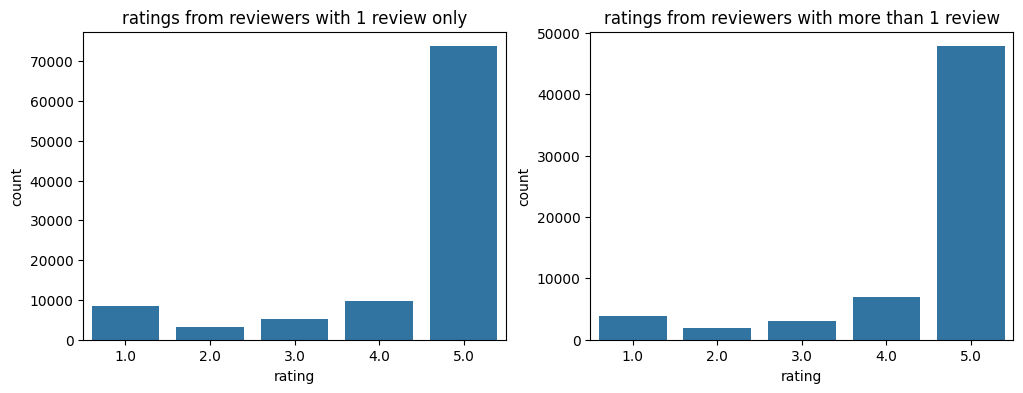

In [41]:
plt.subplots(1,2, figsize=(12,4))

plt.subplot(1,2,1)
sns.countplot(x='rating', data=merged_df[merged_df['multipleReviews_reviewer']==0])
plt.title('ratings from reviewers with 1 review only')

plt.subplot(1,2,2)
sns.countplot(x='rating', data=merged_df[merged_df['multipleReviews_reviewer']==1])
plt.title('ratings from reviewers with more than 1 review')

plt.show()

In [42]:
map_five = merged_df['rating'].groupby(merged_df['user_id']).agg(lambda x: (np.unique(x)==5).all()).to_dict()
map_one = merged_df['rating'].groupby(merged_df['user_id']).agg(lambda x: (np.unique(x)==1).all()).to_dict()


In [43]:
merged_df['reviewer_five_star_only'] = merged_df['user_id'].map(map_five)
merged_df['reviewer_one_star_only'] = merged_df['user_id'].map(map_one)


In [44]:
merged_df['reviewer_five_star_only'] = merged_df['reviewer_five_star_only'].astype(int)
merged_df['reviewer_one_star_only'] = merged_df['reviewer_one_star_only'].astype(int)


In [45]:
map_numreviews = merged_df['asin'].value_counts().to_dict()


In [46]:
merged_df['numReviews_product'] = merged_df['asin'].map(map_numreviews)


In [47]:
print(merged_df.columns)

Index(['rating', 'title', 'text', 'asin', 'parent_asin', 'user_id',
       'timestamp', 'helpful_vote', 'verified_purchase', 'price',
       'is_short_review', 'is_review_burst', 'multipleReviews_reviewer',
       'reviewer_five_star_only', 'reviewer_one_star_only',
       'numReviews_product'],
      dtype='object')


Data Exploration and Visualization


<Figure size 640x480 with 0 Axes>

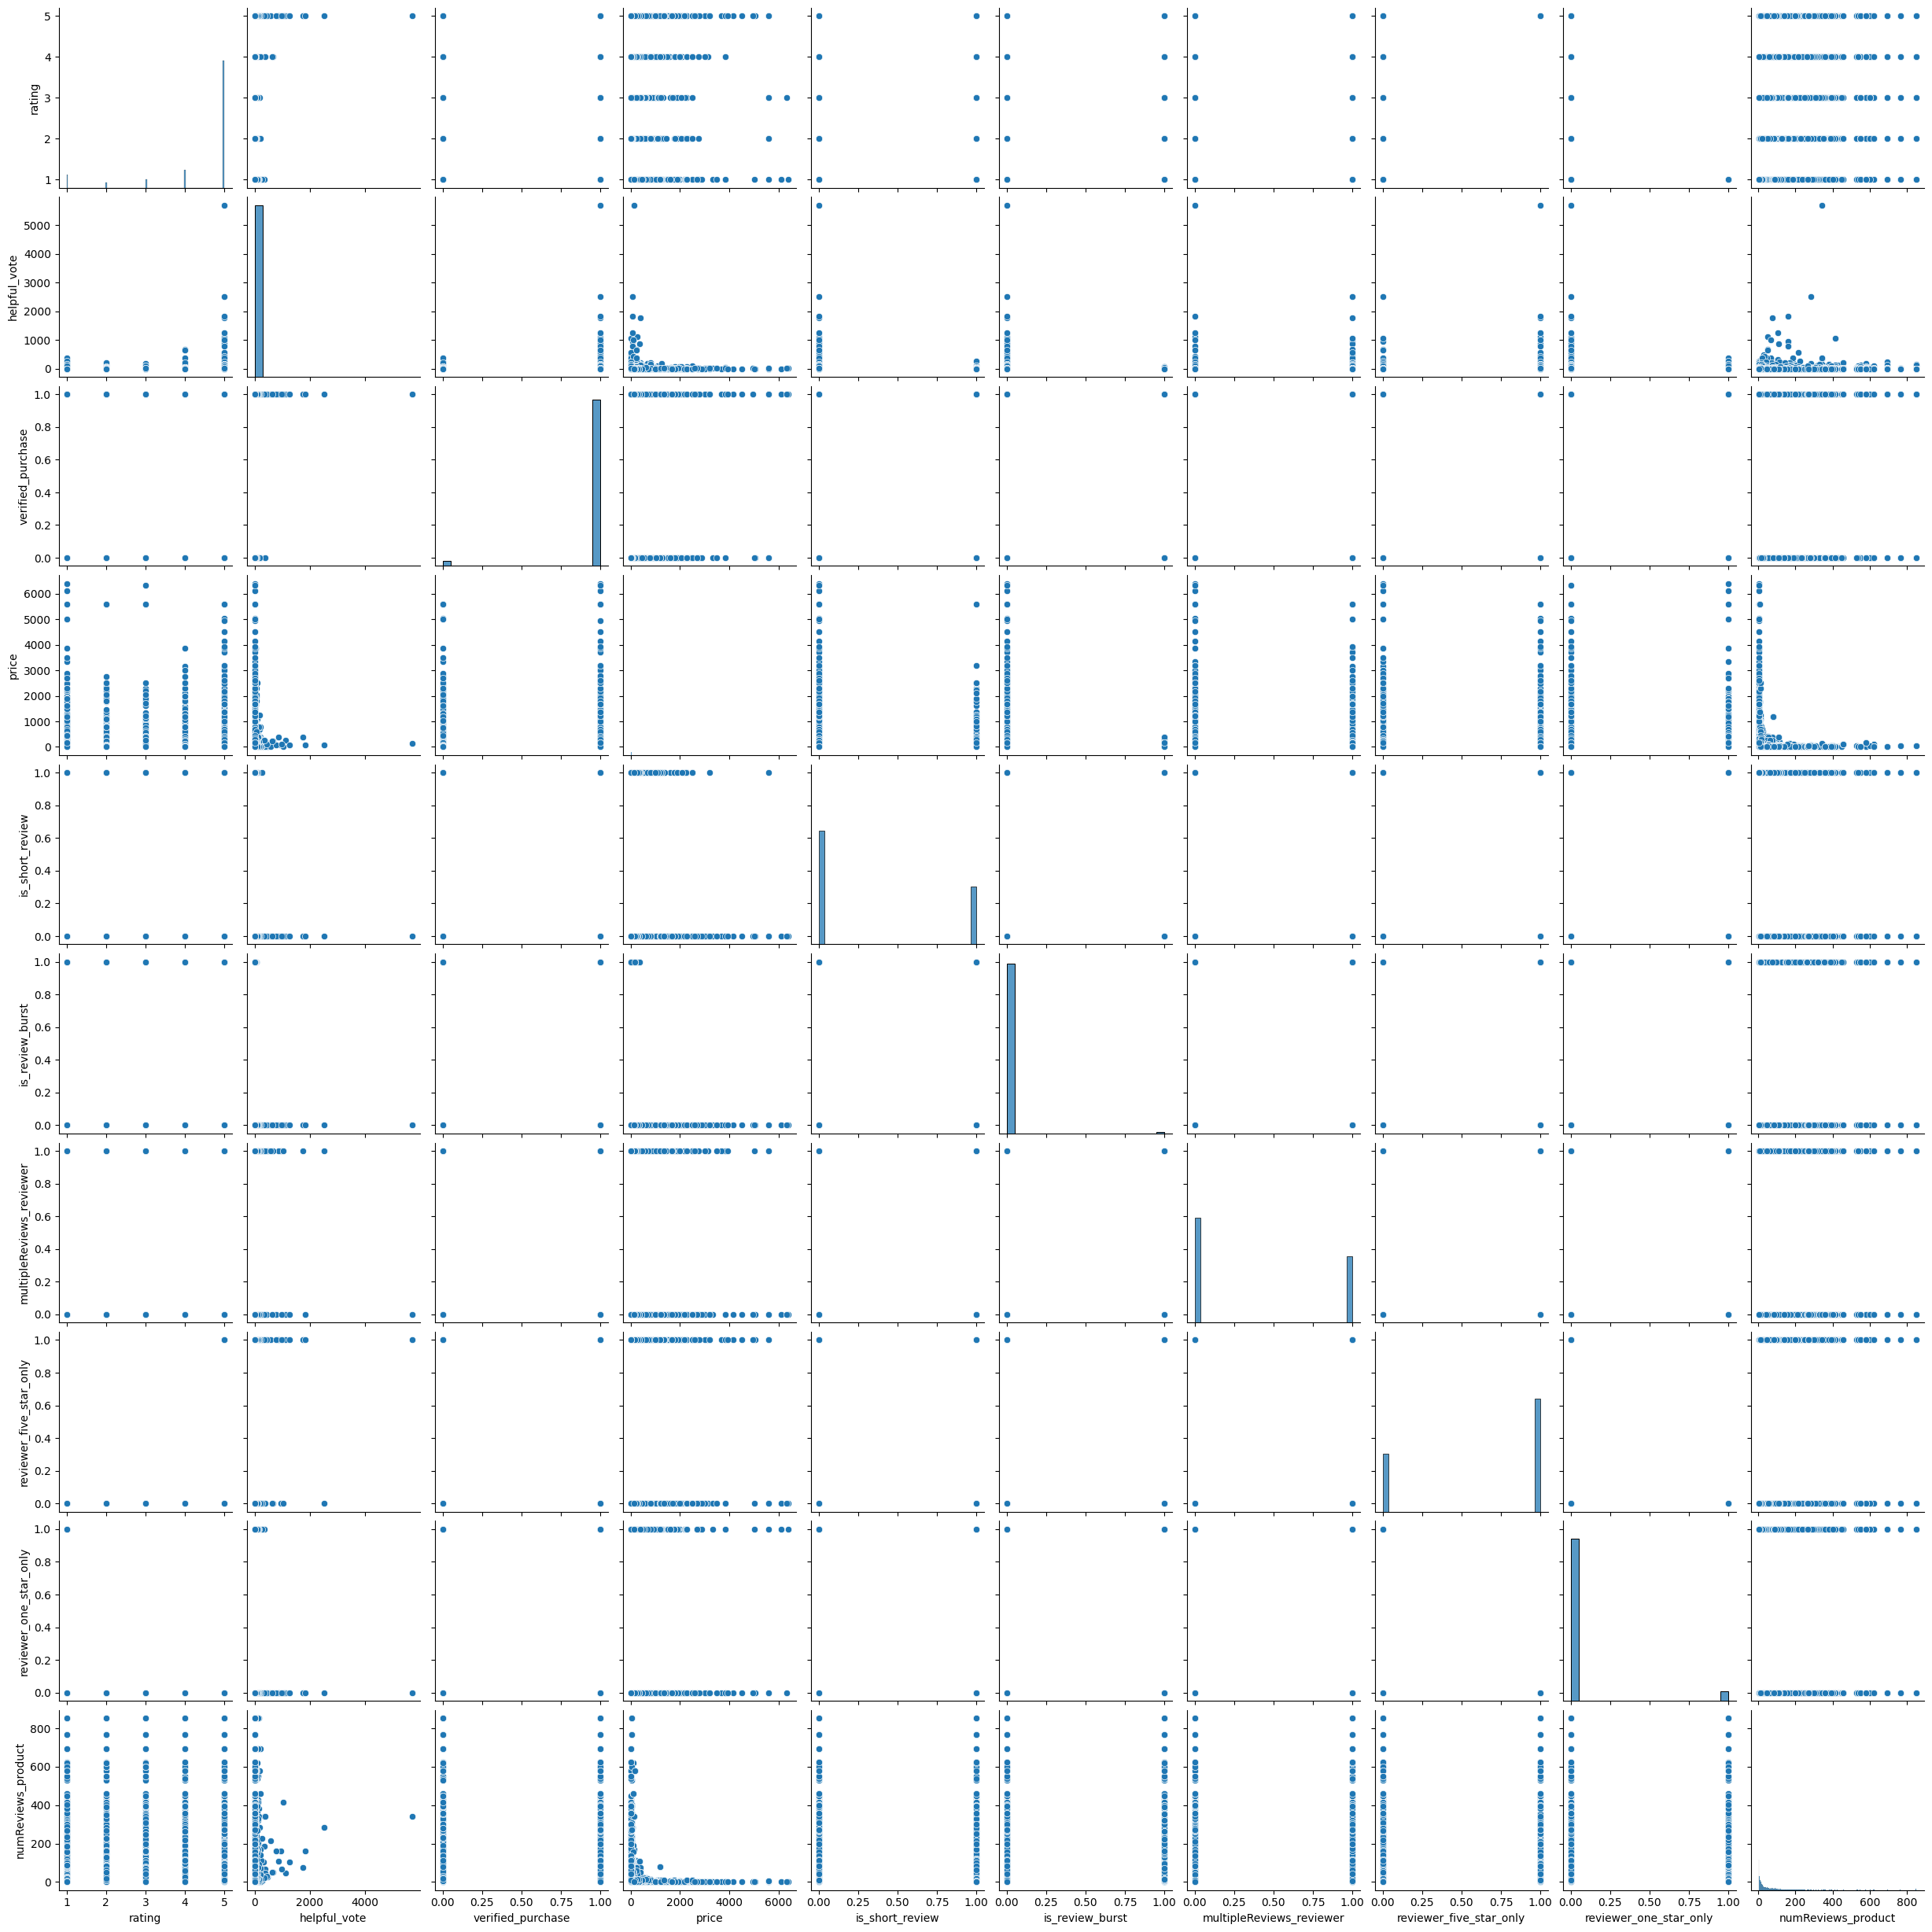

In [48]:
plt.figure()
sns.pairplot(merged_df)
plt.show()

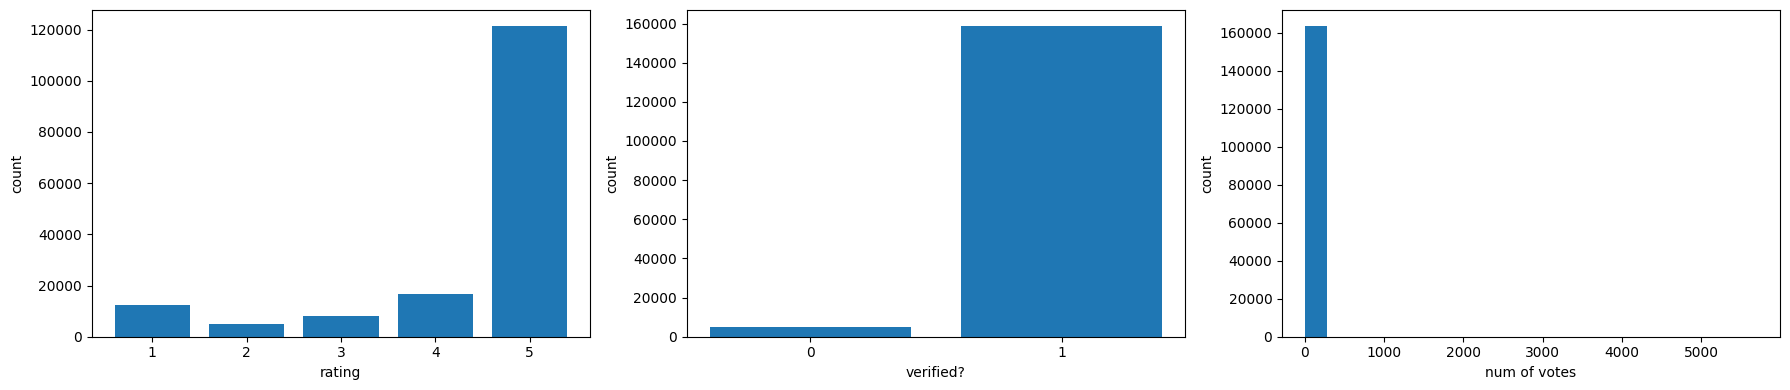

In [49]:
#let's look at the distributions of ratings, verified purchases, and helpful votes.
plt.subplots(1,3, figsize=(18,4))

plt.subplot(1,3,1)
plt.bar(merged_df['rating'].value_counts().index, merged_df['rating'].value_counts().values)
plt.xlabel('rating')
plt.ylabel('count')

plt.subplot(1,3,2)
plt.bar(merged_df['verified_purchase'].value_counts().index, merged_df['verified_purchase'].value_counts().values)
plt.xlabel('verified?')
plt.ylabel('count')
plt.xticks(range(0,2))

plt.subplot(1,3,3)
plt.hist(merged_df['helpful_vote'], bins=20)
plt.xlabel('num of votes')
plt.ylabel('count')

plt.tight_layout()
plt.show()

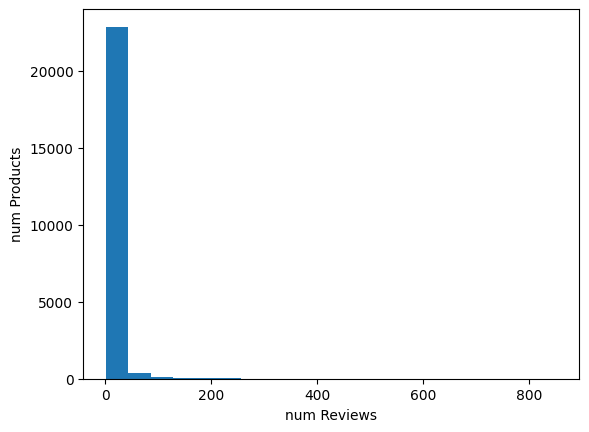

In [50]:
#distribution of number of reviews per product
plt.figure()
plt.hist(merged_df['asin'].value_counts().values, bins=20)
plt.xlabel('num Reviews')
plt.ylabel('num Products')
plt.show()

In [51]:
np.quantile(merged_df['asin'].value_counts().values, np.arange(0,1.05,0.05)).astype(int)

array([  1,   1,   1,   1,   1,   1,   1,   1,   1,   2,   2,   2,   3,
         3,   4,   5,   6,   9,  13,  24, 852])

In [52]:
#creating a dataframe that has the number of reviews per year, but segmented by whether or not the review was associated with a verified purchase
verified_year = merged_df['verified_purchase'].groupby(merged_df['timestamp'].dt.year).value_counts()
verified_year = verified_year.reset_index(level='timestamp').rename(columns={'verified_purchase':'numReviews'}).reset_index()
verified_year.head()

verified_purchase  timestamp  count
0                  1       2003      1
1                  0       2004      1
2                  1       2005      2
3                  0       2005      1
4                  1       2006      4

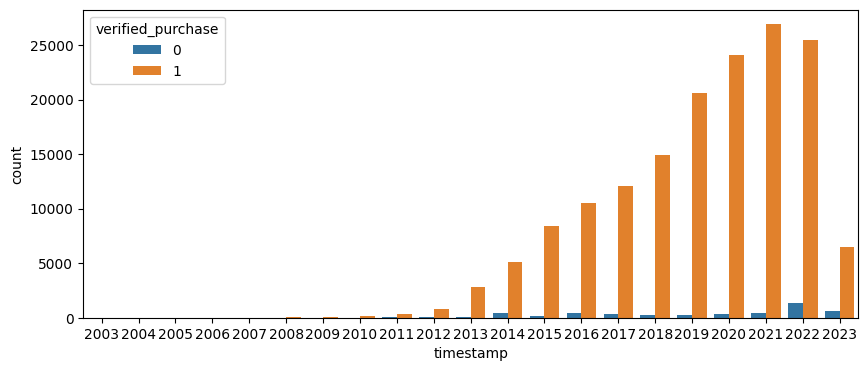

In [53]:
#plotting number of reviews per year (segmented by verified purchases)
plt.figure(figsize=(10,4))
sns.barplot(x='timestamp', y='count', hue='verified_purchase', data=verified_year)
plt.show()

In [54]:
print(merged_df.head())  # Displays the top 5 rows without dropping anything


   rating                          title  \
0     5.0  DIY life saver for dishwasher   
1     5.0   Easy install good filtration   
2     5.0                Works Perfectly   
3     5.0                     Works well   
4     5.0  Great addition to Aeropresss.   

                                                text        asin parent_asin  \
0  Much cheaper DIY FIX for dishwasher than servi...  B07RCVRTJ8  B07RCVRTJ8   
1  These aftermarket filters work very well in my...  B01CC83YAK  B0BXWBPVYS   
2  LG water filters are pretty expensive consider...  B01NBYGVJS  B01NBYGVJS   
3            The filter fit and was easy to install.  B071F7XNS1  B071F7XNS1   
4  I am enjoying experimenting with the different...  B01C94E17C  B01C94E17C   

                        user_id           timestamp  helpful_vote  \
0  AFUYABKLHWTJLJA5RW7LMWNAANSA 2020-01-27 16:14:06             0   
1  AH2UGEK2SRJ2KOZVRIOQCAQ4YURA 2019-09-29 13:23:03             0   
2  AHFTNPZSJR67B4PW3GHDOIIMPGUQ 2020-04-17 12:5

Pre-Modelling

In [55]:
import os
print(os.listdir())


['.config', '.ipynb_checkpoints', 'clean_Appliances.jsonl', 'clean_meta_Appliances.jsonl', 'sample_data']


In [56]:
# !pip uninstall -y nltk
!pip install nltk

import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from textblob import TextBlob
import string

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')
# Initialize lemmatizer and stopwords
lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Tokenization
    tokens = word_tokenize(text)

    # Remove stopwords
    tokens = [word for word in tokens if word not in stop_words]

    # Lemmatization
    tokens = [lemmatizer.lemmatize(word) for word in tokens]

    # Join tokens back to string
    cleaned_text = ' '.join(tokens)

    return cleaned_text

# Apply preprocessing on text column (assuming the column name is 'review_text')
merged_df['cleaned_text'] = merged_df['text'].apply(preprocess_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [57]:
import pandas as pd

# Define expanded negative and positive word lists
negative_words = set(['bad','terrible', 'awful', 'horrible', 'worst', 'useless', 'broken', 'scam', 'waste', 'junk', 'fraud', 'ripoff', 'garbage', 'disgusting', 'misleading', 'cheap', 'fake', 'poor', 'nasty', 'unreliable', 'defective', 'dissatisfied', 'refund', 'return', 'regret', 'hate', 'angry', 'annoyed', 'frustrated', 'pathetic', 'disappointed', 'cheated'])

positive_words = set(['amazing', 'awesome', 'excellent', 'fantastic', 'perfect', 'love', 'best', 'great',
                      'wonderful', 'superb', 'outstanding', 'incredible', 'spectacular', 'brilliant',
                      'highly recommend', 'satisfied', 'happy', 'impressed', 'top-notch', 'exceptional',
                      'flawless', 'must-buy', 'premium', 'worth it', 'five-star', 'favorite', 'reliable',
                      'durable', 'superior', 'affordable', 'valuable', 'comfortable', 'enjoy', 'trusted',
                      'go-to', 'delightful'])

# Function to count negative and positive words in a review
def count_words(text, word_list):
    return sum(1 for word in text.split() if word.lower() in word_list)

# Apply functions to count words in reviews
merged_df["negative_word_count"] = merged_df["cleaned_text"].apply(lambda x: count_words(str(x), negative_words))
merged_df["positive_word_count"] = merged_df["cleaned_text"].apply(lambda x: count_words(str(x), positive_words))

# Define threshold (e.g., Top 5% extreme reviews)
negative_threshold = 5
positive_threshold = 5

# Flag suspiciously extreme reviews
merged_df["fake_review_flag"] = (merged_df["negative_word_count"] > negative_threshold) | (merged_df["positive_word_count"] > positive_threshold)

# Display suspicious reviews
suspicious_reviews = merged_df[merged_df["fake_review_flag"]][["cleaned_text", "negative_word_count", "positive_word_count"]]
print("🚨 Suspicious Fake Reviews:")
print(suspicious_reviews.count())


🚨 Suspicious Fake Reviews:
cleaned_text           127
negative_word_count    127
positive_word_count    127
dtype: int64


In [58]:
merged_df['fake_review_flag']=merged_df['fake_review_flag'].astype(int)

In [59]:
merged_df.drop(columns=['positive_word_count'], inplace=True)
merged_df.drop(columns=['negative_word_count'], inplace=True)

In [60]:
merged_df['length'] = merged_df['cleaned_text'].apply(len)

In [61]:
merged_df = merged_df.drop(columns=["text"])


In [62]:
print(merged_df.dtypes)

rating                             float64
title                               object
asin                                object
parent_asin                         object
user_id                             object
timestamp                   datetime64[ns]
helpful_vote                         int64
verified_purchase                    int64
price                              float64
is_short_review                      int64
is_review_burst                      int64
multipleReviews_reviewer             int64
reviewer_five_star_only              int64
reviewer_one_star_only               int64
numReviews_product                   int64
cleaned_text                        object
fake_review_flag                     int64
length                               int64
dtype: object


In [63]:
df2=merged_df.select_dtypes(include=['int32','int64','float64'])

In [64]:
from sklearn.preprocessing import MinMaxScaler
mm = MinMaxScaler()
df3 = mm.fit_transform(df2)
pd.DataFrame(df3, columns = df2.columns).describe()

rating   helpful_vote  verified_purchase          price  \
count  163925.000000  163925.000000      163925.000000  163925.000000   
mean        0.851161       0.000163           0.969736       0.007361   
std         0.298434       0.003352           0.171313       0.018968   
min         0.000000       0.000000           0.000000       0.000000   
25%         0.750000       0.000000           1.000000       0.001982   
50%         1.000000       0.000000           1.000000       0.003279   
75%         1.000000       0.000000           1.000000       0.005968   
max         1.000000       1.000000           1.000000       1.000000   

       is_short_review  is_review_burst  multipleReviews_reviewer  \
count    163925.000000    163925.000000             163925.000000   
mean          0.335355         0.009425                  0.388385   
std           0.472116         0.096624                  0.487384   
min           0.000000         0.000000                  0.000000   
25%           0.000000         0.000000                  0.000000   
50%           0.000000         0.000000                  0.000000   
75%           1.000000         0.000000                  1.000000   
max           1.000000         1.000000                  1.000000   

       reviewer_five_star_only  reviewer_one_star_only  numReviews_product  \
count            163925.000000           163925.000000       163925.000000   
mean                  0.660101                0.054464            0.104540   
std                   0.473676                0.226932            0.176963   
min                   0.000000                0.000000            0.000000   
25%                   0.000000                0.000000            0.007051   
50%                   1.000000                0.000000            0.030552   
75%                   1.000000                0.000000            0.108108   
max                   1.000000                1.000000            1.000000   

       fake_review_flag         length  
count     163925.000000  163925.000000  
mean           0.000775       0.011702  
std            0.027824       0.018444  
min            0.000000       0.000000  
25%            0.000000       0.002889  
50%            0.000000       0.006444  
75%            0.000000       0.013665  
max            1.000000       1.000000

In [65]:
df_scaled = pd.DataFrame(df3, columns = df2.columns)

Tokenisation and Dimensionality Reduction

In [66]:
from sklearn.feature_extraction.text import TfidfVectorizer

# Define tokenizer (Lemmatizer or Stemmer) if not predefined
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

nltk.download('punkt')
nltk.download('wordnet')

lemmatizer = WordNetLemmatizer()

def custom_tokenizer(text):
    return [lemmatizer.lemmatize(word) for word in word_tokenize(text.lower())]

# Apply TF-IDF
vectorizer = TfidfVectorizer(tokenizer=custom_tokenizer, ngram_range=(1,2), min_df=1000)
review_tokens = vectorizer.fit_transform(merged_df['cleaned_text'])


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [67]:
review_tokens_df = pd.DataFrame.sparse.from_spmatrix(review_tokens, columns=vectorizer.get_feature_names_out())

# Now concatenate the DataFrames
df_final = pd.concat([df_scaled, review_tokens_df], axis = 1)

In [68]:
print(df_final.shape)

(163925, 508)


In [69]:
#import PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=500)
pcs = pca.fit_transform(df_final)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:921: UserWarning: pandas.DataFrame with sparse columns found.It will be converted to a dense numpy array.
  warnings.warn(


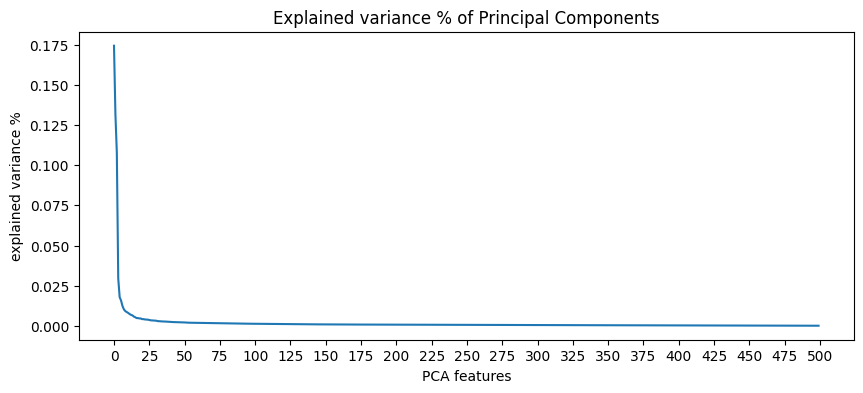

In [70]:
# Plot the explained variances
plt.figure(figsize=(10,4))
plt.plot(range(500), pca.explained_variance_ratio_[0:500])
plt.xlabel('PCA features')
plt.ylabel('explained variance %')
plt.xticks(range(0,501,25))
plt.title('Explained variance % of Principal Components')
plt.show()

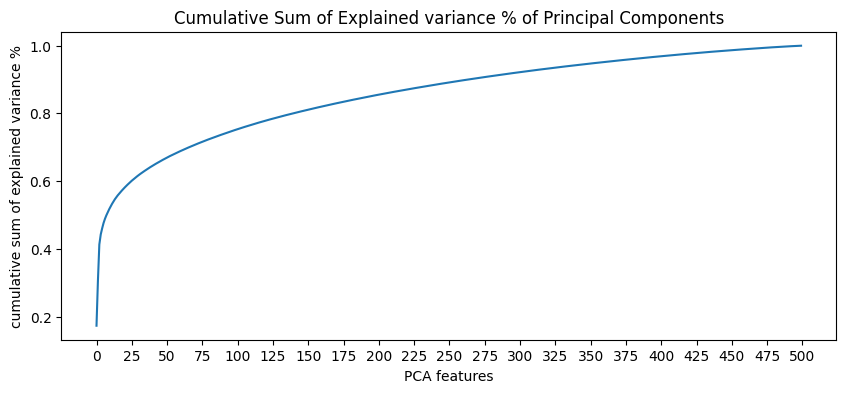

In [71]:
# Plot the cumulative sum of explained variances
plt.figure(figsize=(10,4))
plt.plot(range(500), pca.explained_variance_ratio_.cumsum()[0:500])
plt.xlabel('PCA features')
plt.ylabel('cumulative sum of explained variance %')
plt.xticks(range(0,501,25))
plt.title('Cumulative Sum of Explained variance % of Principal Components')
plt.show()

In [72]:
pca.explained_variance_ratio_.cumsum()[150]

0.8109454446274443

In [73]:
pca.explained_variance_ratio_.cumsum()[200]

0.8552568035371676

In [74]:
pca.explained_variance_ratio_.cumsum()[250]

0.891298540410781

In [75]:

pca.explained_variance_ratio_.cumsum()[300]

0.921536408735655

In [76]:
pca.explained_variance_ratio_.cumsum()[350]

0.9469312481474793

In [77]:
# Save components to a DataFrame
PCA_components = pd.DataFrame(pcs)

In [78]:
print(PCA_components.shape)


(163925, 500)


<function matplotlib.pyplot.show(close=None, block=None)>

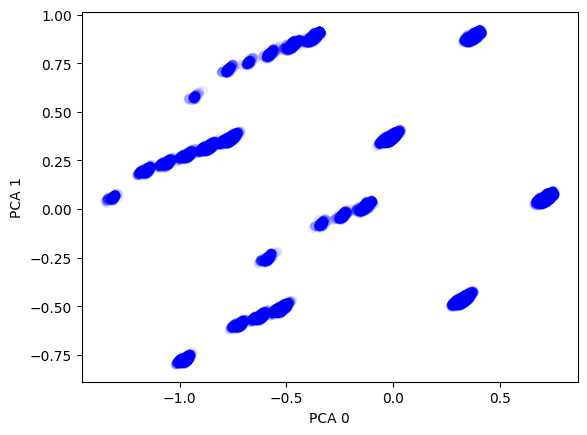

In [79]:
#this is what the first two features look like (plot)
plt.figure()
plt.scatter(PCA_components[0],PCA_components[1], alpha=.05, color='blue')
plt.xlabel('PCA 0')
plt.ylabel('PCA 1')
plt.show

Sentimental Analysis only using cleaned text

In [80]:
merged_df['sentiment'] = merged_df['cleaned_text'].apply(lambda x: TextBlob(x).sentiment.polarity)

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


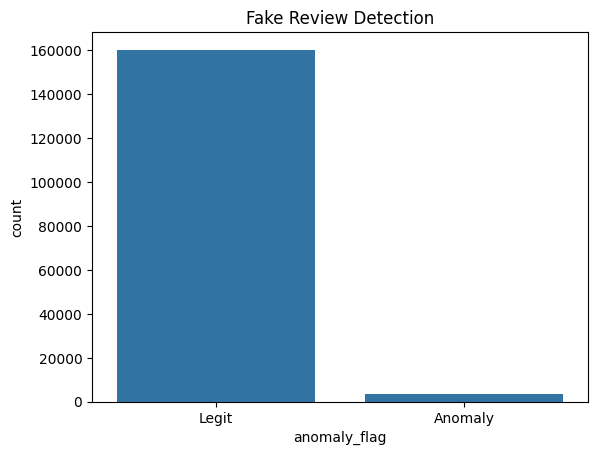

In [81]:
import pandas as pd
import numpy as np
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer
import seaborn as sns
import matplotlib.pyplot as plt

# Load Data
nltk.download("vader_lexicon")
sia = SentimentIntensityAnalyzer()

# Define anomalies
def detect_anomalies(row):
    if row["sentiment"] > 0.3 and row["rating"] < 3:
        return "Anomaly"
    elif row["sentiment"] < -0.3 and row["rating"] > 3:
        return "Anomaly"
    else:
        return "Legit"

merged_df["anomaly_flag"] = merged_df.apply(detect_anomalies, axis=1)

# Plot results
sns.countplot(x="anomaly_flag", data=merged_df)
plt.title("Fake Review Detection")
plt.show()


K-Means Algorithm

In [82]:
from sklearn.cluster import KMeans

In [83]:
from sklearn.cluster import KMeans
#we begin by trying to determine the optimal number of clusters by looking at inertia scores
#cycle through different K values and append inertia score to list
k_values = range(8,32)
inertia_scores = []

for k in k_values:
    #instantiate
    kmeans_model = KMeans(n_clusters=k, verbose=1, random_state=42)
    #fitting on first 300 PCs
    kmeans_model.fit(PCA_components.iloc[:,0:300])
    #get scores and append them
    inertia = kmeans_model.inertia_
    #append score
    inertia_scores.append(inertia)

Initialization complete
Iteration 0, inertia 307146.78477568115.
Iteration 1, inertia 160876.82211067766.
Iteration 2, inertia 160496.87388242042.
Iteration 3, inertia 160438.15137986207.
Iteration 4, inertia 160396.91289538462.
Iteration 5, inertia 160367.89834063116.
Iteration 6, inertia 160359.73098260697.
Iteration 7, inertia 160357.1681897436.
Iteration 8, inertia 160355.38286509673.
Iteration 9, inertia 160354.2974002806.
Iteration 10, inertia 160353.75579931715.
Iteration 11, inertia 160353.47728341288.
Iteration 12, inertia 160353.35326353108.
Iteration 13, inertia 160353.30758842893.
Iteration 14, inertia 160353.27832974246.
Iteration 15, inertia 160353.2548503529.
Iteration 16, inertia 160353.24738729867.
Iteration 17, inertia 160353.2427771605.
Converged at iteration 17: center shift 4.192200867256072e-07 within tolerance 5.672660010181676e-07.
Initialization complete
Iteration 0, inertia 298359.563779935.
Iteration 1, inertia 159866.12567581603.
Iteration 2, inertia 159394.

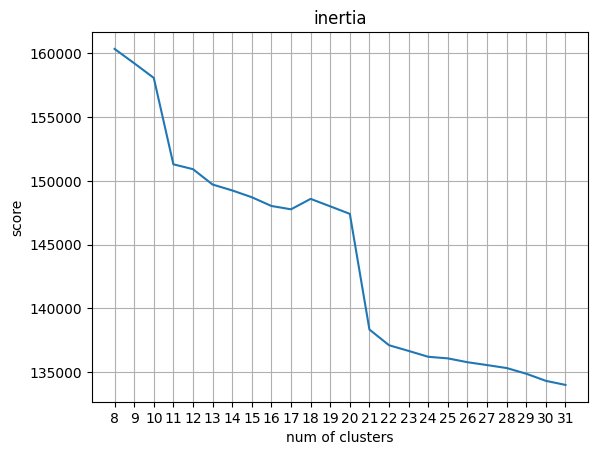

In [84]:
plt.figure()
plt.plot(k_values, inertia_scores)
plt.xlabel('num of clusters')
plt.ylabel('score')
plt.title('inertia')
plt.xticks(k_values)
plt.grid()
#plt.ylim(0,580000)
plt.show()


Based on the graph, there is a decrease in the slope at the following number of clusters: 11. Let's choose k= 11

In [85]:
#instantiate KMeans with  clusters
kmeans_model11 = KMeans(n_clusters=22, verbose=1, random_state=42)
#fitting KMeans on first 300 PCs
kmeans_model11.fit(PCA_components.iloc[:,0:300])

Initialization complete
Iteration 0, inertia 243291.6307674424.
Iteration 1, inertia 143141.4873146581.
Iteration 2, inertia 141317.47693216984.
Iteration 3, inertia 140415.96109497664.
Iteration 4, inertia 140035.87442167287.
Iteration 5, inertia 139697.98095450783.
Iteration 6, inertia 139389.87960667023.
Iteration 7, inertia 139136.17244282275.
Iteration 8, inertia 138694.88595299417.
Iteration 9, inertia 138292.0849511479.
Iteration 10, inertia 138183.31526509527.
Iteration 11, inertia 138143.73318619526.
Iteration 12, inertia 137990.76009757203.
Iteration 13, inertia 137165.3764991017.
Iteration 14, inertia 137126.5108889802.
Iteration 15, inertia 137118.36188720385.
Iteration 16, inertia 137115.15016147864.
Iteration 17, inertia 137112.49825467748.
Iteration 18, inertia 137111.10004765913.
Iteration 19, inertia 137110.28963631057.
Iteration 20, inertia 137109.8172334064.
Iteration 21, inertia 137108.91917407987.
Iteration 22, inertia 137108.35614871792.
Iteration 23, inertia 1371

KMeans(n_clusters=22, random_state=42, verbose=1)

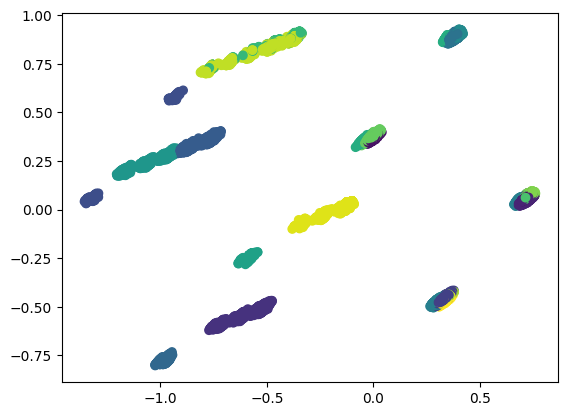

In [86]:
plt.figure()
plt.scatter(PCA_components[0],PCA_components[1], c=kmeans_model11.labels_)
plt.show()

In [87]:
import joblib

joblib.dump(kmeans_model11, 'kmeans_model11.pkl')

['kmeans_model11.pkl']

In [88]:
#getting 2 matrices
# 1) data with principal components (PCs)
# 2) PCs and features
# only getting 300 PCs as those the model was fit only on those PCs
data_pc_matrix = PCA_components.iloc[:,0:300].to_numpy()
pc_feature_matrix = pca.components_[0:300,:]

In [89]:
#performing matrix multiplication to get the reviews back in terms of the original features; will then save this reconstructed data to a dataframe
df_recon = pd.DataFrame(np.matmul(data_pc_matrix,pc_feature_matrix), columns=df_final.columns)

In [90]:
print(df_recon.shape)
df_recon.head()

(163925, 508)


rating  helpful_vote  verified_purchase     price  is_short_review  \
0  0.149068     -0.000228           0.030268  0.004067         0.664251   
1  0.148755     -0.000099           0.030118 -0.002417         0.664151   
2  0.149754      0.000074           0.029803 -0.004348        -0.336597   
3  0.150814     -0.000059           0.029021 -0.006408         0.661920   
4  0.149146      0.000073           0.030342 -0.005822        -0.335997   

   is_review_burst  multipleReviews_reviewer  reviewer_five_star_only  \
0        -0.009125                 -0.388332                 0.339793   
1        -0.009293                 -0.388351                 0.339878   
2        -0.009578                  0.611581                 0.339979   
3        -0.008388                  0.611688                 0.339768   
4        -0.009586                  0.611610                 0.339773   

   reviewer_one_star_only  numReviews_product  ...   working     worth  \
0               -0.054829           -0.098614  ... -0.013434 -0.003502   
1               -0.054475            0.127021  ... -0.009505 -0.004783   
2               -0.054131           -0.078601  ... -0.009670 -0.010176   
3               -0.054067           -0.102037  ... -0.008446 -0.000838   
4               -0.054669           -0.069354  ... -0.008714 -0.011553   

      would  would recommend     wrong      year  year old       yet  \
0 -0.013098        -0.005482 -0.005492 -0.009190  0.001004 -0.006307   
1 -0.013172        -0.003724 -0.002519 -0.010354  0.000034 -0.007552   
2 -0.013405        -0.004755 -0.009209 -0.011596 -0.001289 -0.004393   
3 -0.014882        -0.003407  0.004728 -0.012215 -0.003506  0.000247   
4 -0.014212        -0.003229 -0.010127 -0.010743 -0.008397 -0.006416   

    youtube         ’  
0 -0.001261 -0.021894  
1 -0.002152 -0.021903  
2 -0.008099 -0.022763  
3 -0.004455 -0.023632  
4 -0.007794 -0.022765  

[5 rows x 508 columns]

In [91]:
#adding cluster labels to the reconstructed dataframe
df_recon['cluster'] = kmeans_model11.labels_

In [92]:
# Check for duplicate column names
duplicate_columns = df_recon.columns[df_recon.columns.duplicated()]

# If duplicate columns exist, rename them or drop them
if len(duplicate_columns) > 0:
    print("Duplicate columns found:", duplicate_columns)

    # Option 1: Rename duplicate columns
    for i, col in enumerate(duplicate_columns):
        df_recon.rename(columns={col: f"{col}_{i+1}"}, inplace=True)

    # Option 2: Drop duplicate columns
    df_recon = df_recon.loc[:,~df_recon.columns.duplicated()]


Duplicate columns found: Index(['price'], dtype='object')


In [93]:
#saving the df to the computer in a compressed h5 format (saves faster than other compression techniques)
df_recon.to_hdf('df_recon_11_kmeans.h5', key='df', mode='w')

In [94]:
df_recon

rating  helpful_vote  verified_purchase   price_1  is_short_review  \
0       0.149068     -0.000228           0.030268  0.004067         0.664251   
1       0.148755     -0.000099           0.030118 -0.002417         0.664151   
2       0.149754      0.000074           0.029803 -0.004348        -0.336597   
3       0.150814     -0.000059           0.029021 -0.006408         0.661920   
4       0.149146      0.000073           0.030342 -0.005822        -0.335997   
...          ...           ...                ...       ...              ...   
163920  0.148968     -0.000142           0.030188 -0.003178         0.664164   
163921  0.148910     -0.000073           0.030373  0.006223         0.664469   
163922  0.150079     -0.000113           0.030618  0.000618        -0.335124   
163923  0.149273     -0.000150           0.030513 -0.007001        -0.335936   
163924 -0.850426     -0.000092           0.030145  0.002180         0.663933   

        is_review_burst  multipleReviews_reviewer  reviewer_five_star_only  \
0             -0.009125                 -0.388332                 0.339793   
1             -0.009293                 -0.388351                 0.339878   
2             -0.009578                  0.611581                 0.339979   
3             -0.008388                  0.611688                 0.339768   
4             -0.009586                  0.611610                 0.339773   
...                 ...                       ...                      ...   
163920        -0.009415                 -0.388367                 0.339895   
163921        -0.009205                  0.611695                 0.339892   
163922        -0.009394                  0.611472                 0.339316   
163923        -0.009638                 -0.388376                 0.340098   
163924        -0.009499                 -0.388361                -0.660162   

        reviewer_one_star_only  numReviews_product  ...     worth     would  \
0                    -0.054829           -0.098614  ... -0.003502 -0.013098   
1                    -0.054475            0.127021  ... -0.004783 -0.013172   
2                    -0.054131           -0.078601  ... -0.010176 -0.013405   
3                    -0.054067           -0.102037  ... -0.000838 -0.014882   
4                    -0.054669           -0.069354  ... -0.011553 -0.014212   
...                        ...                 ...  ...       ...       ...   
163920               -0.054455           -0.103454  ... -0.005877 -0.014822   
163921               -0.054463           -0.102113  ... -0.006021 -0.014745   
163922               -0.054695           -0.098790  ... -0.001228 -0.012872   
163923               -0.054402           -0.092216  ... -0.006217 -0.022372   
163924                0.945522           -0.102313  ... -0.002906 -0.014849   

        would recommend     wrong      year  year old       yet   youtube  \
0             -0.005482 -0.005492 -0.009190  0.001004 -0.006307 -0.001261   
1             -0.003724 -0.002519 -0.010354  0.000034 -0.007552 -0.002152   
2             -0.004755 -0.009209 -0.011596 -0.001289 -0.004393 -0.008099   
3             -0.003407  0.004728 -0.012215 -0.003506  0.000247 -0.004455   
4             -0.003229 -0.010127 -0.010743 -0.008397 -0.006416 -0.007794   
...                 ...       ...       ...       ...       ...       ...   
163920        -0.000854 -0.002028 -0.010888 -0.002517 -0.004778 -0.003810   
163921        -0.001237 -0.003903 -0.008121 -0.002206 -0.002705 -0.005350   
163922        -0.004769 -0.006737  0.243781  0.112509  0.001653  0.000512   
163923        -0.000744 -0.011833 -0.005725 -0.007604  0.002097 -0.007113   
163924        -0.001413 -0.004467 -0.013530 -0.002653 -0.010126 -0.005094   

               ’  cluster  
0      -0.021894        2  
1      -0.021903        2  
2      -0.022763       16  
3      -0.023632        8  
4      -0.022765       16  
...          ...      ...  
163920 -0.021980       15  
163921 -0.0219

In [95]:
df = pd.read_hdf('df_recon_11_kmeans.h5')

In [96]:
df

rating  helpful_vote  verified_purchase   price_1  is_short_review  \
0       0.149068     -0.000228           0.030268  0.004067         0.664251   
1       0.148755     -0.000099           0.030118 -0.002417         0.664151   
2       0.149754      0.000074           0.029803 -0.004348        -0.336597   
3       0.150814     -0.000059           0.029021 -0.006408         0.661920   
4       0.149146      0.000073           0.030342 -0.005822        -0.335997   
...          ...           ...                ...       ...              ...   
163920  0.148968     -0.000142           0.030188 -0.003178         0.664164   
163921  0.148910     -0.000073           0.030373  0.006223         0.664469   
163922  0.150079     -0.000113           0.030618  0.000618        -0.335124   
163923  0.149273     -0.000150           0.030513 -0.007001        -0.335936   
163924 -0.850426     -0.000092           0.030145  0.002180         0.663933   

        is_review_burst  multipleReviews_reviewer  reviewer_five_star_only  \
0             -0.009125                 -0.388332                 0.339793   
1             -0.009293                 -0.388351                 0.339878   
2             -0.009578                  0.611581                 0.339979   
3             -0.008388                  0.611688                 0.339768   
4             -0.009586                  0.611610                 0.339773   
...                 ...                       ...                      ...   
163920        -0.009415                 -0.388367                 0.339895   
163921        -0.009205                  0.611695                 0.339892   
163922        -0.009394                  0.611472                 0.339316   
163923        -0.009638                 -0.388376                 0.340098   
163924        -0.009499                 -0.388361                -0.660162   

        reviewer_one_star_only  numReviews_product  ...     worth     would  \
0                    -0.054829           -0.098614  ... -0.003502 -0.013098   
1                    -0.054475            0.127021  ... -0.004783 -0.013172   
2                    -0.054131           -0.078601  ... -0.010176 -0.013405   
3                    -0.054067           -0.102037  ... -0.000838 -0.014882   
4                    -0.054669           -0.069354  ... -0.011553 -0.014212   
...                        ...                 ...  ...       ...       ...   
163920               -0.054455           -0.103454  ... -0.005877 -0.014822   
163921               -0.054463           -0.102113  ... -0.006021 -0.014745   
163922               -0.054695           -0.098790  ... -0.001228 -0.012872   
163923               -0.054402           -0.092216  ... -0.006217 -0.022372   
163924                0.945522           -0.102313  ... -0.002906 -0.014849   

        would recommend     wrong      year  year old       yet   youtube  \
0             -0.005482 -0.005492 -0.009190  0.001004 -0.006307 -0.001261   
1             -0.003724 -0.002519 -0.010354  0.000034 -0.007552 -0.002152   
2             -0.004755 -0.009209 -0.011596 -0.001289 -0.004393 -0.008099   
3             -0.003407  0.004728 -0.012215 -0.003506  0.000247 -0.004455   
4             -0.003229 -0.010127 -0.010743 -0.008397 -0.006416 -0.007794   
...                 ...       ...       ...       ...       ...       ...   
163920        -0.000854 -0.002028 -0.010888 -0.002517 -0.004778 -0.003810   
163921        -0.001237 -0.003903 -0.008121 -0.002206 -0.002705 -0.005350   
163922        -0.004769 -0.006737  0.243781  0.112509  0.001653  0.000512   
163923        -0.000744 -0.011833 -0.005725 -0.007604  0.002097 -0.007113   
163924        -0.001413 -0.004467 -0.013530 -0.002653 -0.010126 -0.005094   

               ’  cluster  
0      -0.021894        2  
1      -0.021903        2  
2      -0.022763       16  
3      -0.023632        8  
4      -0.022765       16  
...          ...      ...  
163920 -0.021980       15  
163921 -0.0219

In [97]:
print(df.columns.tolist())


['rating', 'helpful_vote', 'verified_purchase', 'price_1', 'is_short_review', 'is_review_burst', 'multipleReviews_reviewer', 'reviewer_five_star_only', 'reviewer_one_star_only', 'numReviews_product', 'fake_review_flag', 'length', '1', '10', '12', '15', '2', '20', '3', '30', '4', '5', '6', '6 month', 'able', 'actually', 'add', 'advertised', 'ago', 'air', 'almost', 'already', 'also', 'always', 'amazon', 'amount', 'another', 'anything', 'apart', 'appliance', 'area', 'around', 'arrived', 'away', 'awesome', 'back', 'bad', 'bag', 'basket', 'best', 'better', 'big', 'bit', 'black', 'bottom', 'bought', 'box', 'br', 'brand', 'break', 'brew', 'broke', 'broken', 'burner', 'buy', 'buying', 'came', 'cant', 'case', 'change', 'cheap', 'cheaper', 'clean', 'cleaning', 'clear', 'close', 'clothes', 'coffee', 'coffee filter', 'coffee ground', 'coffee maker', 'cold', 'color', 'come', 'company', 'compared', 'complaint', 'completely', 'correct', 'cost', 'could', 'couldnt', 'counter', 'couple', 'cover', 'cube'

In [98]:
non_tokens_clust = list(df.columns[0:12]) + ['cluster']
tokens_clust = list(df.columns[12:])


In [99]:
tokens_clust

['1',
 '10',
 '12',
 '15',
 '2',
 '20',
 '3',
 '30',
 '4',
 '5',
 '6',
 '6 month',
 'able',
 'actually',
 'add',
 'advertised',
 'ago',
 'air',
 'almost',
 'already',
 'also',
 'always',
 'amazon',
 'amount',
 'another',
 'anything',
 'apart',
 'appliance',
 'area',
 'around',
 'arrived',
 'away',
 'awesome',
 'back',
 'bad',
 'bag',
 'basket',
 'best',
 'better',
 'big',
 'bit',
 'black',
 'bottom',
 'bought',
 'box',
 'br',
 'brand',
 'break',
 'brew',
 'broke',
 'broken',
 'burner',
 'buy',
 'buying',
 'came',
 'cant',
 'case',
 'change',
 'cheap',
 'cheaper',
 'clean',
 'cleaning',
 'clear',
 'close',
 'clothes',
 'coffee',
 'coffee filter',
 'coffee ground',
 'coffee maker',
 'cold',
 'color',
 'come',
 'company',
 'compared',
 'complaint',
 'completely',
 'correct',
 'cost',
 'could',
 'couldnt',
 'counter',
 'couple',
 'cover',
 'cube',
 'cup',
 'cup coffee',
 'customer',
 'cut',
 'cycle',
 'day',
 'deal',
 'decided',
 'definitely',
 'delivered',
 'delivery',
 'described',
 'des

In [100]:
print("Non-token columns:", df.columns[:12].tolist())
print("Token columns:", df.columns[12:].tolist())


Non-token columns: ['rating', 'helpful_vote', 'verified_purchase', 'price_1', 'is_short_review', 'is_review_burst', 'multipleReviews_reviewer', 'reviewer_five_star_only', 'reviewer_one_star_only', 'numReviews_product', 'fake_review_flag', 'length']
Token columns: ['1', '10', '12', '15', '2', '20', '3', '30', '4', '5', '6', '6 month', 'able', 'actually', 'add', 'advertised', 'ago', 'air', 'almost', 'already', 'also', 'always', 'amazon', 'amount', 'another', 'anything', 'apart', 'appliance', 'area', 'around', 'arrived', 'away', 'awesome', 'back', 'bad', 'bag', 'basket', 'best', 'better', 'big', 'bit', 'black', 'bottom', 'bought', 'box', 'br', 'brand', 'break', 'brew', 'broke', 'broken', 'burner', 'buy', 'buying', 'came', 'cant', 'case', 'change', 'cheap', 'cheaper', 'clean', 'cleaning', 'clear', 'close', 'clothes', 'coffee', 'coffee filter', 'coffee ground', 'coffee maker', 'cold', 'color', 'come', 'company', 'compared', 'complaint', 'completely', 'correct', 'cost', 'could', 'couldnt', '

In [101]:
#let's look at average rating by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,0].sort_values(ascending=False)

cluster
18    0.148887
16    0.148858
21    0.148855
4     0.148853
1     0.148850
0     0.148838
9     0.148837
8     0.148819
17    0.148819
2     0.148814
10    0.148814
13    0.148802
15    0.148794
6     0.058778
14    0.023200
19   -0.059106
20   -0.214582
3    -0.275623
11   -0.608182
12   -0.850894
5    -0.851149
7    -0.851220
Name: rating, dtype: float64

In [102]:

#let's look at average verified purchase by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,2].sort_values(ascending=False)

cluster
16    0.030269
4     0.030267
2     0.030267
18    0.030258
21    0.030257
8     0.030255
1     0.030247
15    0.027798
10    0.026856
0     0.024483
17    0.024144
14    0.020119
20    0.015345
19    0.015295
12    0.006668
3    -0.014580
7    -0.023759
6    -0.029063
11   -0.031170
5    -0.039518
9    -0.969691
13   -0.969699
Name: verified_purchase, dtype: float64

In [103]:
#let's look at average votes by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,1].sort_values(ascending=False)

cluster
7     0.000172
11    0.000111
3     0.000099
5     0.000098
6     0.000085
4     0.000056
16    0.000047
21    0.000036
1     0.000035
13    0.000023
9    -0.000014
18   -0.000100
12   -0.000101
10   -0.000117
15   -0.000126
8    -0.000126
17   -0.000127
2    -0.000127
0    -0.000137
14   -0.000146
19   -0.000175
20   -0.000186
Name: helpful_vote, dtype: float64

In [104]:
#let's look at Word Count by cluster
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,11].sort_values(ascending=False)

cluster
13    0.013975
9     0.012318
11    0.009590
3     0.007736
6     0.007104
7     0.006010
16    0.003305
4     0.002957
5     0.002703
1     0.001682
21    0.001435
18   -0.002200
19   -0.009194
15   -0.009223
14   -0.009234
0    -0.009236
10   -0.009394
8    -0.009536
20   -0.009554
2    -0.009719
12   -0.009756
17   -0.010254
Name: length, dtype: float64

In [117]:
#let's look at multipleReviews_reviewer by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,6].sort_values(ascending=False)

cluster
11    0.611622
14    0.611620
6     0.611619
13    0.611619
19    0.611618
1     0.611616
16    0.611614
5     0.611610
10    0.611609
8     0.611607
20   -0.388375
17   -0.388380
18   -0.388381
9    -0.388382
21   -0.388382
15   -0.388383
4    -0.388383
2    -0.388384
0    -0.388384
7    -0.388385
12   -0.388385
3    -0.388397
Name: multipleReviews_reviewer, dtype: float64

In [118]:
#let's look at reviewer_five_star_only by cluster which informs us if reviewers post more than 1 review or not
df.loc[:,non_tokens_clust].groupby('cluster').mean().iloc[:,7].sort_values(ascending=False)

cluster
21    0.339911
18    0.339908
4     0.339908
13    0.339907
9     0.339907
17    0.339896
2     0.339896
1     0.339895
0     0.339893
15    0.339893
16    0.339893
8     0.339886
10    0.339886
14   -0.660067
20   -0.660068
19   -0.660074
11   -0.660093
7    -0.660096
6    -0.660098
5    -0.660104
12   -0.660129
3    -0.660130
Name: reviewer_five_star_only, dtype: float64

In [123]:
df_tokens = df.loc[:,tokens_clust].groupby('cluster').mean()

In [127]:
df_review = df_tokens.iloc[:,0:508]

In [128]:
#now let's print the top 20 review tokens of cluster 10
cluster=10
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])


great            0.398064
work great       0.174465
great product    0.089406
work             0.085203
great price      0.057173
product          0.049118
worked great     0.040251
worked           0.017262
great value      0.017026
value            0.013167
fast             0.009484
shipping         0.006084
delivery         0.005693
deal             0.005288
taste great      0.003051
item             0.001887
described        0.001677
quality          0.001392
easy install     0.001075
service          0.000871
Name: 10, dtype: float64


In [136]:
#now let's print the top 20 review tokens of cluster 7
cluster=7
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])


’               0.029560
return          0.025780
waste           0.021829
month           0.020112
money           0.019959
water           0.018851
even            0.018090
one             0.015010
would           0.014823
filter          0.014414
back            0.012973
disappointed    0.012498
get             0.012378
returned        0.012205
week            0.011862
buy             0.011613
tried           0.011150
dont            0.010885
broke           0.010400
doesnt          0.010382
Name: 7, dtype: float64


In [137]:
#now let's print the top 20 review tokens of cluster 13
cluster=13
print(df_review.iloc[cluster,:].sort_values(ascending=False)[0:20])


br              0.022922
egg             0.021229
filter          0.017882
ice             0.016527
water           0.012871
keep            0.010641
refrigerator    0.009939
little          0.009559
coffee          0.009410
make            0.009333
use             0.009251
recommend       0.008956
well            0.008718
love            0.008659
door            0.008551
come            0.008380
machine         0.008219
made            0.008186
’               0.008140
nice            0.007893
Name: 13, dtype: float64


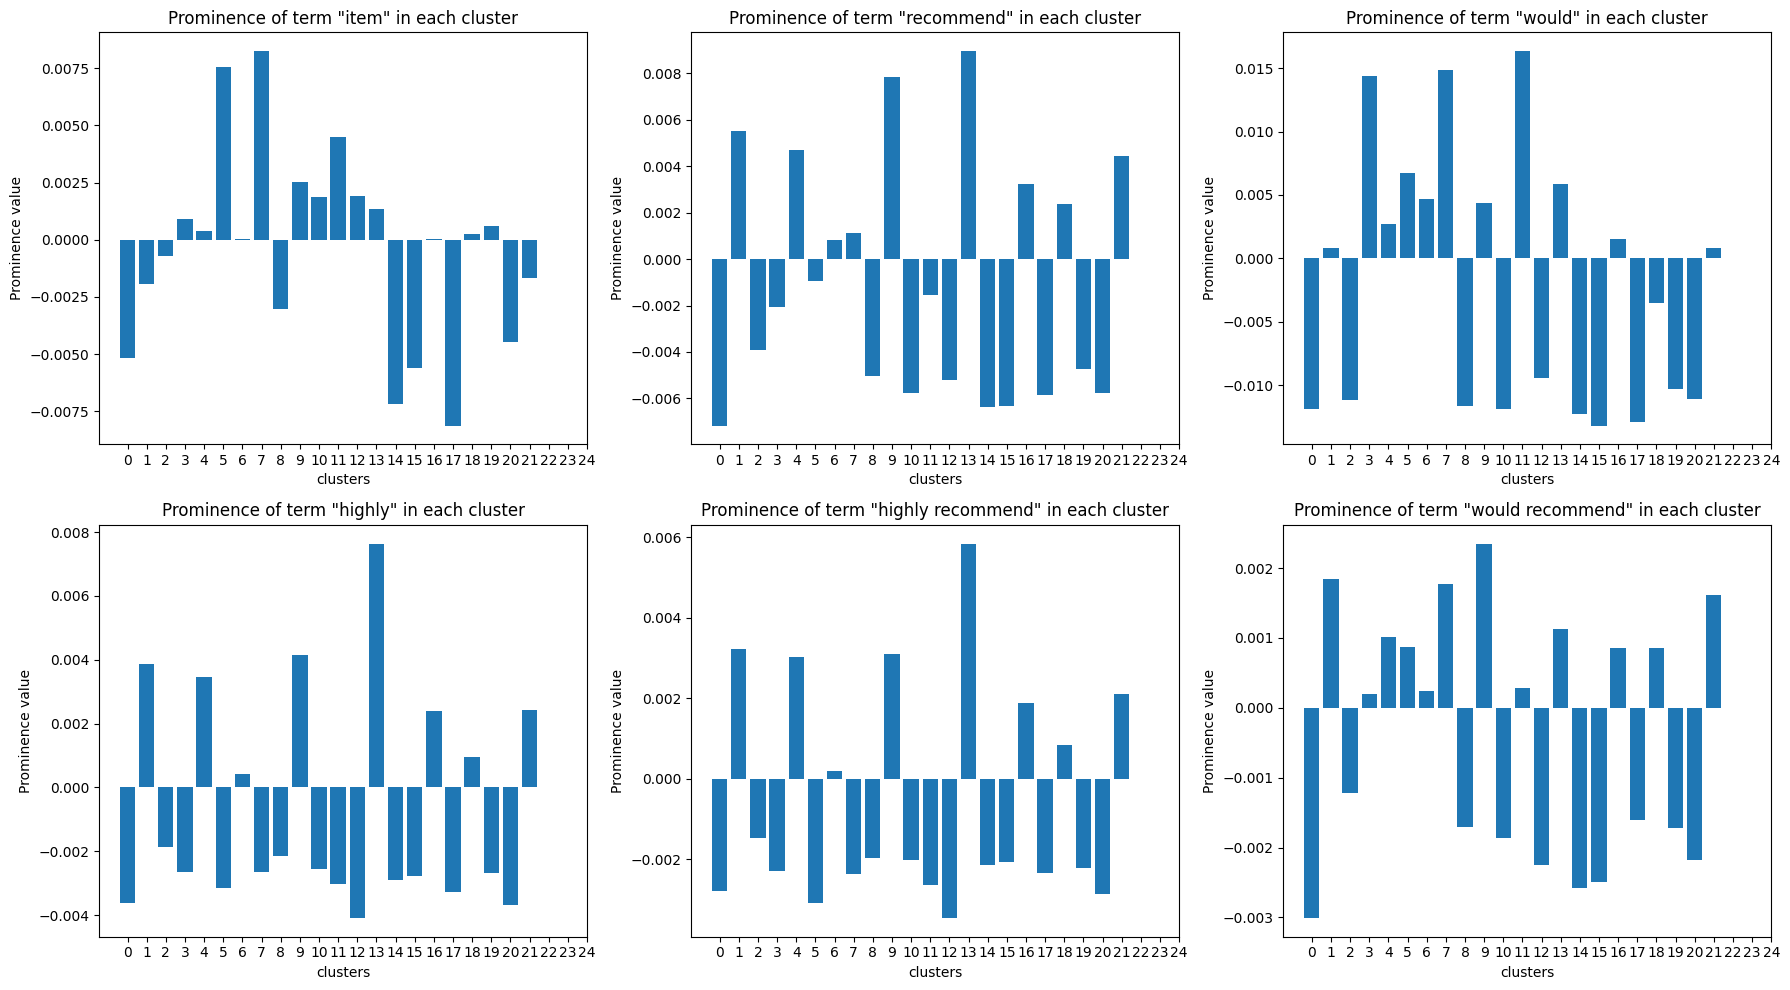

In [116]:

tokens = ['item', 'recommend','would', 'highly', 'highly recommend',
          'would recommend']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(2,3, figsize=(18,10))
for token in range(len(tokens)):
    plt.subplot(2,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

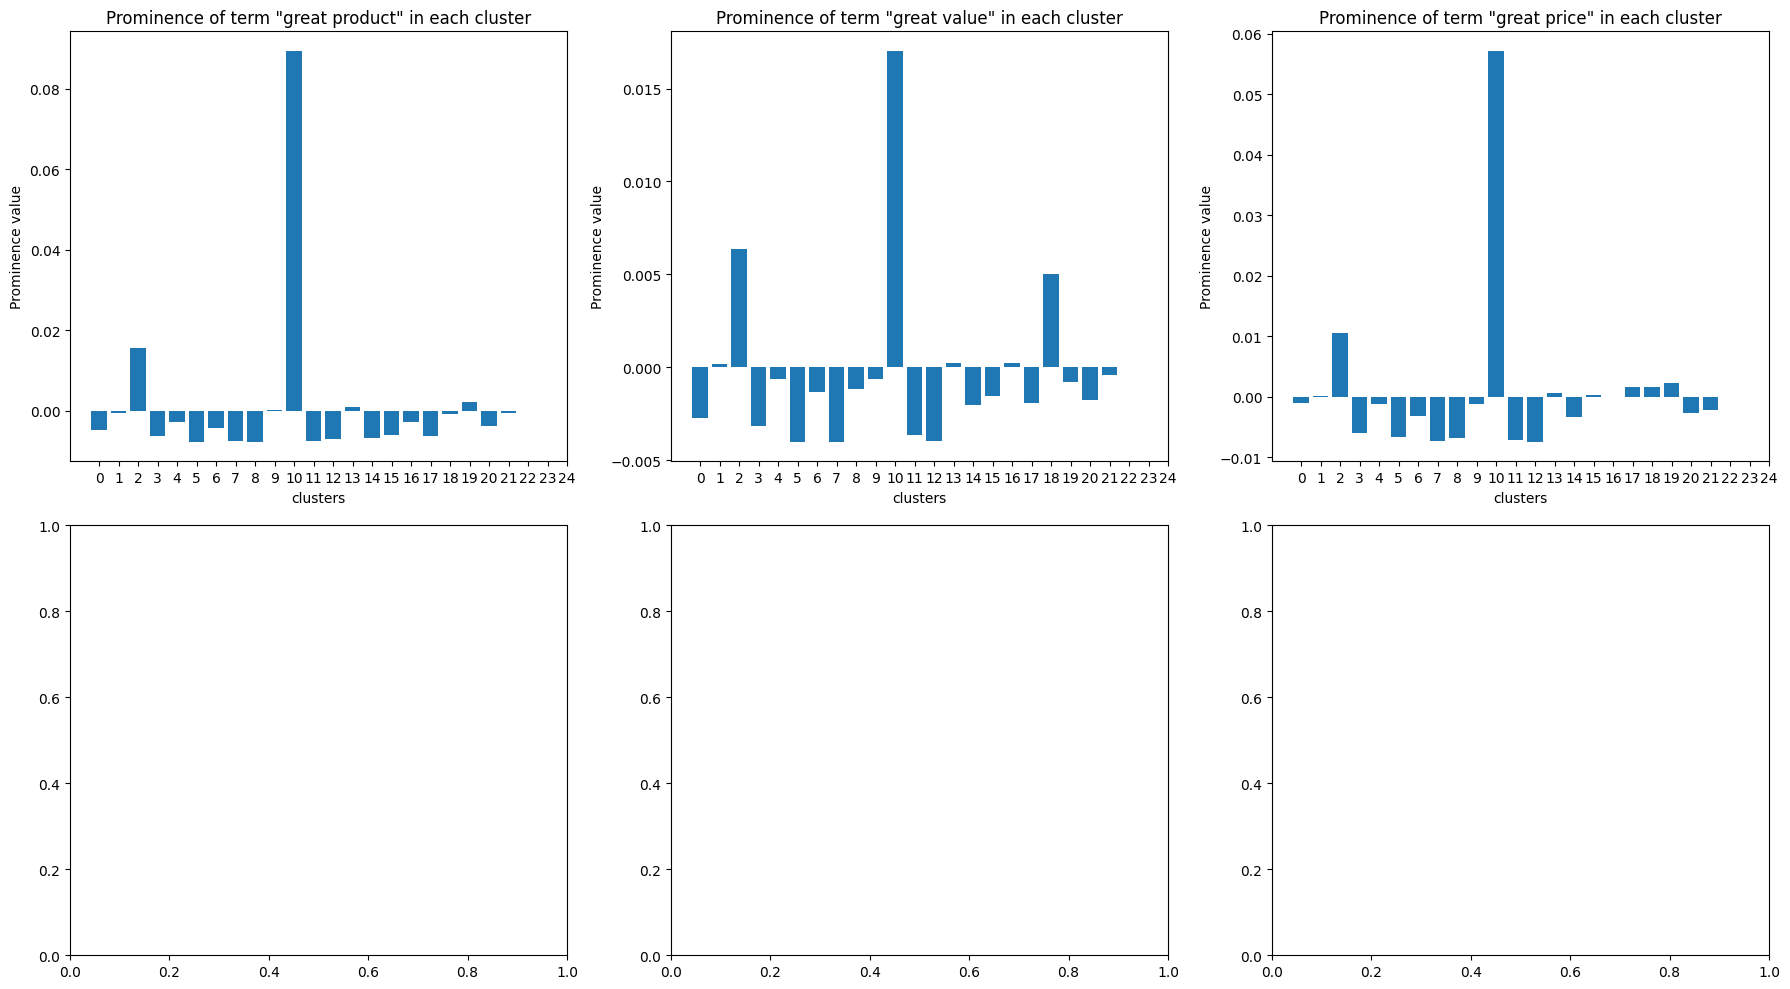

In [130]:

tokens = ['great product','great value', 'great price']
df_tokens = df[tokens+['cluster']].groupby('cluster').mean()

plt.subplots(2,3, figsize=(18,10))
for token in range(len(tokens)):
    plt.subplot(2,3,token+1)
    #plt.figure(figsize=(7,4))
    plt.bar(df_tokens.index, df_tokens[tokens[token]])
    plt.xticks(range(25))
    plt.xlabel('clusters')
    plt.ylabel('Prominence value')
    plt.title(f'Prominence of term "{tokens[token]}" in each cluster')
plt.tight_layout()
plt.show()

LDA Analysis

In [108]:
review_text=merged_df['cleaned_text']

In [109]:
word_matrix = vectorizer.fit_transform(review_text)

/usr/local/lib/python3.11/dist-packages/sklearn/feature_extraction/text.py:517: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [110]:
# !pip install gensim
from gensim.models.ldamodel import LdaModel as LDA
from gensim.matutils import Sparse2Corpus

# ... (Your existing code) ...

# Convert the sparse matrix to a Gensim corpus
corpus = Sparse2Corpus(word_matrix, documents_columns=False)

# Setting number of topics and also the top number of words we want to see from the model
number_topics = 22
number_words = 15

# Now use the Gensim corpus in LDA
lda = LDA(corpus=corpus, id2word={i: s for i, s in enumerate(vectorizer.get_feature_names_out())},
          num_topics=number_topics, passes=10, random_state=42)

In [111]:
# Print topics found by Gensim LDA model
print("Topics found via Gensim LDA:")

for topic_num, topic in lda.show_topics(num_topics=number_topics, num_words=number_words, formatted=False):
    print(f"\nTopic #{topic_num}:")
    print(", ".join([word[0] for word in topic]))  # Extract words from the topic tuples


Topics found via Gensim LDA:

Topic #0:
expected, hose, ’, place, washer, wash, stay, clothes, put, everything, cut, heat, dryer, get, plastic

Topic #1:
product, great product, excellent, great, good product, good, quick, fit well, installation, service, price, well, delivery, seller, fit

Topic #2:
price, great price, fast, great, item, recommend, thank, shipping, delivery, buy, would, highly, highly recommend, would recommend, product

Topic #3:
br, one, water, 1, light, star, 5, review, would, filter, flow, get, give, see, wont

Topic #4:
coffee, cup, advertised, keurig, ground, filter, use, pod, make, reusable, using, kcups, brew, love, grind

Topic #5:
stove, good price, egg, made, good, top, cover, vent, counter, price, well made, space, look, well, customer

Topic #6:
didnt, work, return, fit, like, work like, model, sure, one, different, wrong, number, would, part, said

Topic #7:
value, money, great value, good value, happy, save, purchase, great, pleased, good, better, much 

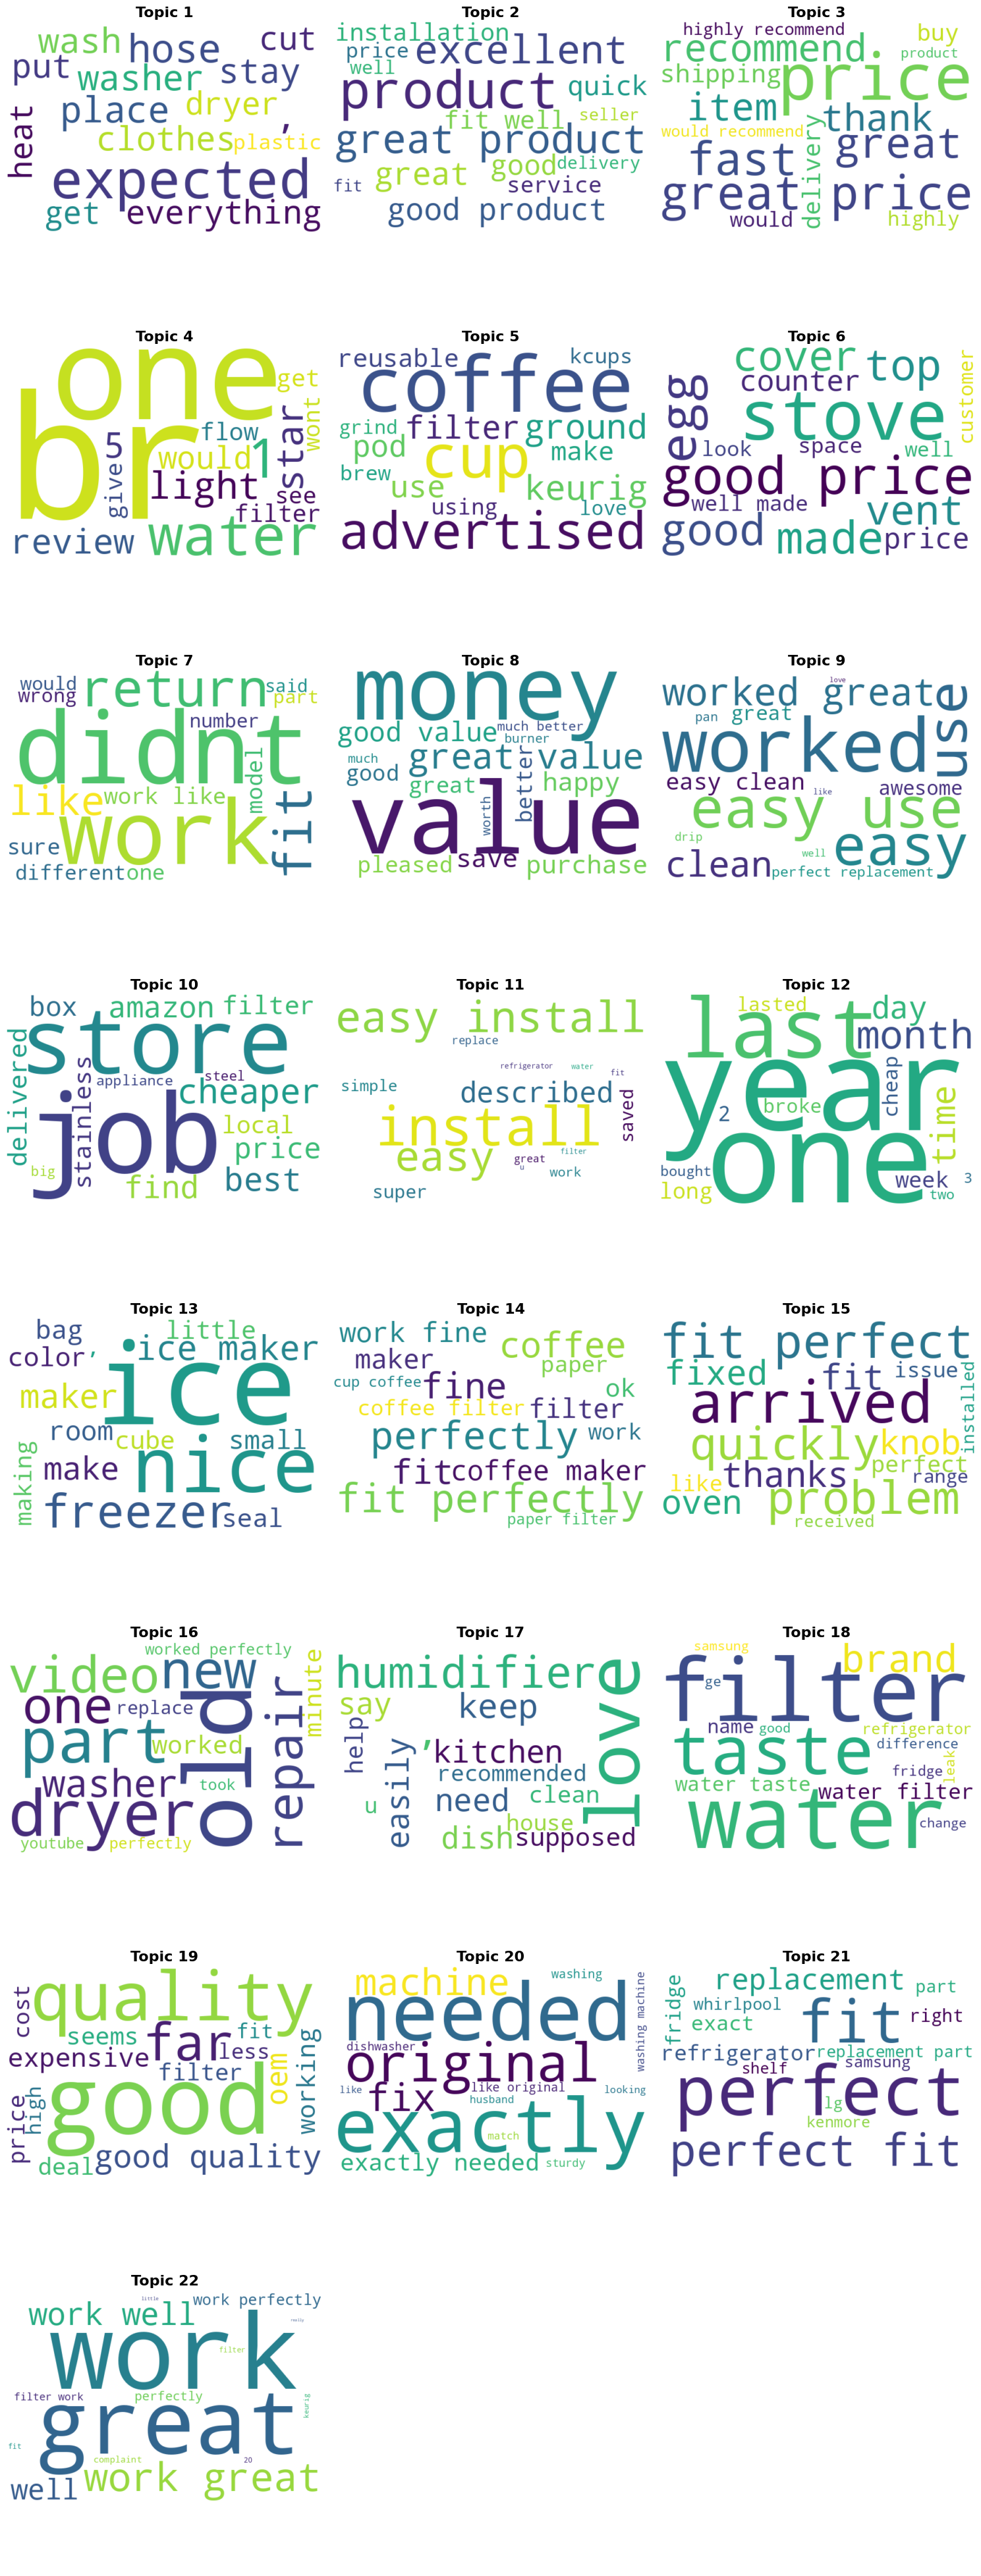

In [154]:
from wordcloud import WordCloud
corpus = Sparse2Corpus(word_matrix, documents_columns=False)
id2word = {i: word for i, word in enumerate(vectorizer.get_feature_names_out())}
def plot_wordcloud(lda_model, num_topics, id2word):
    rows = (num_topics + 2) // 3  # Arrange in a grid (dynamically adjust based on topics)
    cols = min(num_topics, 3)  # Limit columns to max 3 for better visibility
    fig, axes = plt.subplots(rows, cols, figsize=(15, 5 * rows))  # Adjust size dynamically

    for i, ax in enumerate(axes.flat):  # Loop through subplots
        if i < num_topics:
            word_freq = dict(lda_model.show_topic(i, 15))  # Get top 15 words per topic
            wordcloud = WordCloud(width=600, height=400, background_color='white').generate_from_frequencies(word_freq)

            ax.imshow(wordcloud, interpolation="bilinear")
            ax.axis("off")
            ax.set_title(f"Topic {i+1}", fontsize=16, fontweight='bold')
        else:
            ax.axis("off")  # Hide extra subplots

    plt.tight_layout()
    plt.show()

# Plot word clouds for each topic
plot_wordcloud(lda, number_topics, id2word)

In [112]:
# Get topic distribution for each document (review)
topic_distributions = []

for doc in corpus:
    topic_dist = lda.get_document_topics(doc, minimum_probability=0)
    topic_distributions.append([weight for _, weight in topic_dist])

# Convert to DataFrame
import pandas as pd
topic_df = pd.DataFrame(topic_distributions, columns=[f'topic_{i}' for i in range(number_topics)])


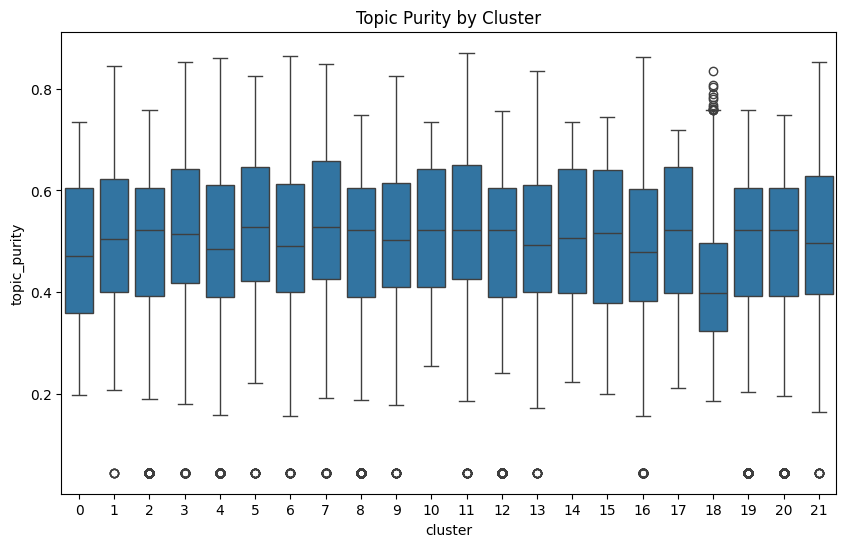

In [113]:
df_recon['topic_purity'] = topic_df.max(axis=1)

# Compare topic purity across clusters
import seaborn as sns

plt.figure(figsize=(10,6))
sns.boxplot(x='cluster', y='topic_purity', data=df_recon)
plt.title("Topic Purity by Cluster")
plt.show()


In [141]:
df_recon

rating  helpful_vote  verified_purchase   price_1  is_short_review  \
0       0.149068     -0.000228           0.030268  0.004067         0.664251   
1       0.148755     -0.000099           0.030118 -0.002417         0.664151   
2       0.149754      0.000074           0.029803 -0.004348        -0.336597   
3       0.150814     -0.000059           0.029021 -0.006408         0.661920   
4       0.149146      0.000073           0.030342 -0.005822        -0.335997   
...          ...           ...                ...       ...              ...   
163920  0.148968     -0.000142           0.030188 -0.003178         0.664164   
163921  0.148910     -0.000073           0.030373  0.006223         0.664469   
163922  0.150079     -0.000113           0.030618  0.000618        -0.335124   
163923  0.149273     -0.000150           0.030513 -0.007001        -0.335936   
163924 -0.850426     -0.000092           0.030145  0.002180         0.663933   

        is_review_burst  multipleReviews_reviewer  reviewer_five_star_only  \
0             -0.009125                 -0.388332                 0.339793   
1             -0.009293                 -0.388351                 0.339878   
2             -0.009578                  0.611581                 0.339979   
3             -0.008388                  0.611688                 0.339768   
4             -0.009586                  0.611610                 0.339773   
...                 ...                       ...                      ...   
163920        -0.009415                 -0.388367                 0.339895   
163921        -0.009205                  0.611695                 0.339892   
163922        -0.009394                  0.611472                 0.339316   
163923        -0.009638                 -0.388376                 0.340098   
163924        -0.009499                 -0.388361                -0.660162   

        reviewer_one_star_only  numReviews_product  ...     would  \
0                    -0.054829           -0.098614  ... -0.013098   
1                    -0.054475            0.127021  ... -0.013172   
2                    -0.054131           -0.078601  ... -0.013405   
3                    -0.054067           -0.102037  ... -0.014882   
4                    -0.054669           -0.069354  ... -0.014212   
...                        ...                 ...  ...       ...   
163920               -0.054455           -0.103454  ... -0.014822   
163921               -0.054463           -0.102113  ... -0.014745   
163922               -0.054695           -0.098790  ... -0.012872   
163923               -0.054402           -0.092216  ... -0.022372   
163924                0.945522           -0.102313  ... -0.014849   

        would recommend     wrong      year  year old       yet   youtube  \
0             -0.005482 -0.005492 -0.009190  0.001004 -0.006307 -0.001261   
1             -0.003724 -0.002519 -0.010354  0.000034 -0.007552 -0.002152   
2             -0.004755 -0.009209 -0.011596 -0.001289 -0.004393 -0.008099   
3             -0.003407  0.004728 -0.012215 -0.003506  0.000247 -0.004455   
4             -0.003229 -0.010127 -0.010743 -0.008397 -0.006416 -0.007794   
...                 ...       ...       ...       ...       ...       ...   
163920        -0.000854 -0.002028 -0.010888 -0.002517 -0.004778 -0.003810   
163921        -0.001237 -0.003903 -0.008121 -0.002206 -0.002705 -0.005350   
163922        -0.004769 -0.006737  0.243781  0.112509  0.001653  0.000512   
163923        -0.000744 -0.011833 -0.005725 -0.007604  0.002097 -0.007113   
163924        -0.001413 -0.004467 -0.013530 -0.002653 -0.010126 -0.005094   

               ’  cluster  topic_purity  
0      -0.021894        2      0.301181  
1      -0.021903        2      0.576847  
2      -0.022763       16      0.841304  
3      -0.023632        8      0.367973  
4      -0.022765       16      0.788700  
...          ...      ...           ...  
163920 -0.021980       15      0.270198  
163921 -0.021953      

In [142]:
df_recon['fake_review_suspect'] = df_recon['cluster'].apply(lambda x: 1 if x in [10, 13] else 0)


In [143]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
X = df_recon[['fake_review_suspect']]  # Predictor
y = df_recon['price_1']                  # Target variable

model = LinearRegression()
model.fit(X, y)

print(f"Coefficient: {model.coef_[0]}")
print(f"Intercept: {model.intercept_}")


Coefficient: -0.00032310625613872555
Intercept: 7.582673584661462e-06


In [144]:
X = sm.add_constant(df_recon[['fake_review_suspect']])  # Adds intercept
y = df_recon['price_1']

model = sm.OLS(y, X).fit()

print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                price_1   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     8.240
Date:                Sat, 08 Mar 2025   Prob (F-statistic):            0.00410
Time:                        17:02:30   Log-Likelihood:             5.8315e+05
No. Observations:              163925   AIC:                        -1.166e+06
Df Residuals:                  163923   BIC:                        -1.166e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                7.583e-06   1

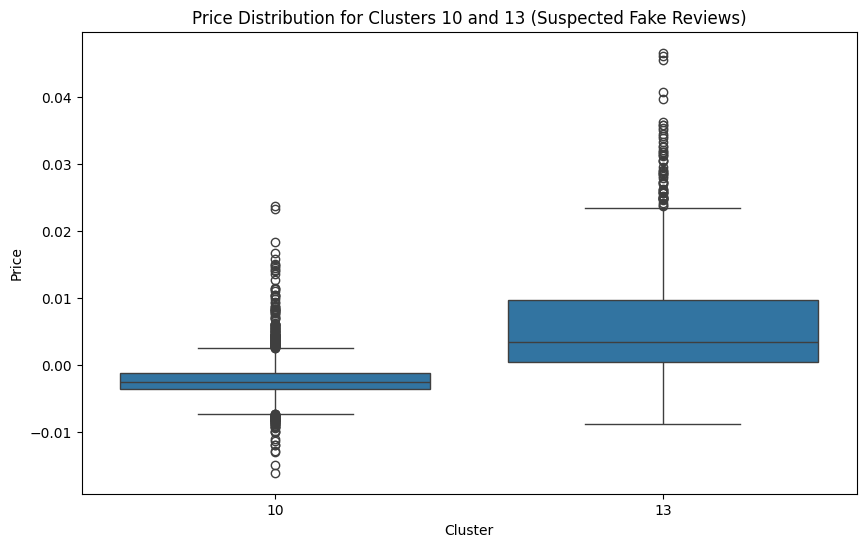

In [146]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter data for clusters 2 and 3
df_fake_reviews = df_recon[df_recon['cluster'].isin([10, 13])]

# Plotting
plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='price_1', data=df_fake_reviews)
plt.title('Price Distribution for Clusters 10 and 13 (Suspected Fake Reviews)')
plt.xlabel('Cluster')
plt.ylabel('Price')
plt.show()


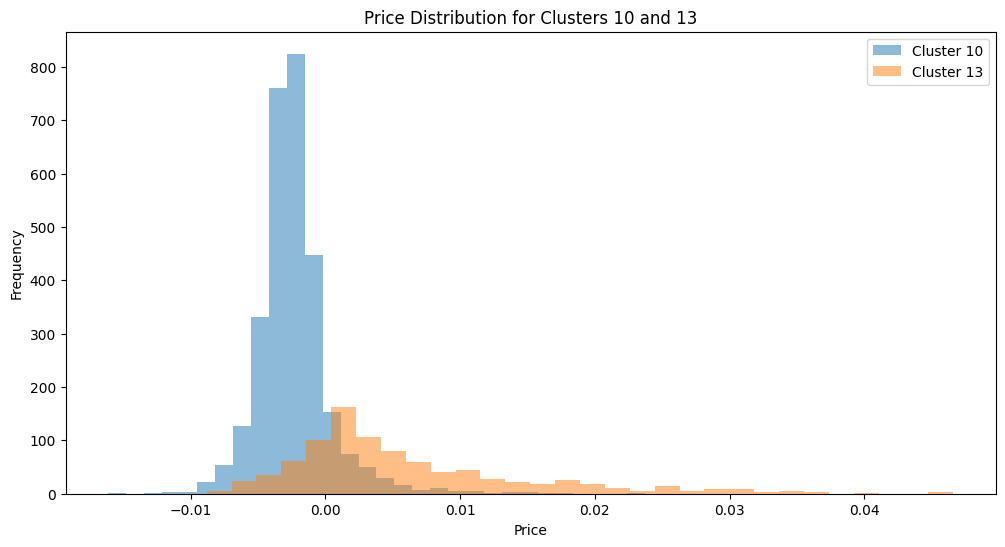

In [157]:
plt.figure(figsize=(12, 6))

for cluster in [10, 13]:
    subset = df_recon[df_recon['cluster'] == cluster]
    plt.hist(subset['price_1'], bins=30, alpha=0.5, label=f'Cluster {cluster}')

plt.legend()
plt.title('Price Distribution for Clusters 10 and 13')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()


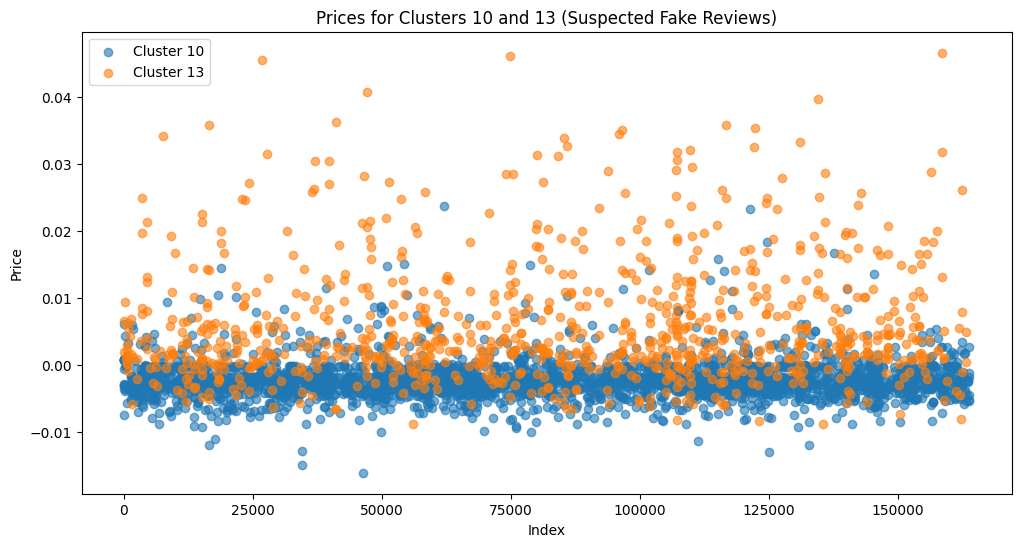

In [149]:
plt.figure(figsize=(12, 6))

for cluster in [10, 13]:
    subset = df_recon[df_recon['cluster'] == cluster]
    plt.scatter(subset.index, subset['price_1'], label=f'Cluster {cluster}', alpha=0.6)

plt.legend()
plt.title('Prices for Clusters 10 and 13 (Suspected Fake Reviews)')
plt.xlabel('Index')
plt.ylabel('Price')
plt.show()
